<a href="https://colab.research.google.com/github/asim5800/Retail-Sales-Prediction/blob/main/Retail_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

## Loading Libraries & Data

In [1]:
!pip3 install -r requirements.txt


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [ ]:
%pip install python-dotenv


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [3]:
from dbrepo.RestClient import RestClient
import os
from dotenv import load_dotenv, dotenv_values 
load_dotenv() 

client = RestClient(endpoint="https://test.dbrepo.tuwien.ac.at", username=os.getenv("DBREPO_USERNAME"), password=os.getenv("DBREPO_PASSWORD"))
store = client.get_identifier_data(identifier_id="9627ec46-4ee6-4969-b14a-bda555fe34db") 
store

#store https://test.dbrepo.tuwien.ac.at/pid/9627ec46-4ee6-4969-b14a-bda555fe34db https://handle.test.datacite.org/10.82556/nqeg-gy34
#train https://test.dbrepo.tuwien.ac.at/pid/b1c59499-9c6e-42c2-af8f-840181e809db https://handle.test.datacite.org/10.82556/yb6j-jw41
#test https://test.dbrepo.tuwien.ac.at/pid/7cbb845c-21dd-4b60-b990-afa8754a0dd9 https://handle.test.datacite.org/10.82556/jerg-4b84

,store,storetype,assortment,competitiondistance,competitionopensincemonth,competitionopensinceyear,promo2,promo2sinceweek,promo2sinceyear,promointerval
0,1,c,a,1270,9,2008,false,None,None,None
1,2,a,a,570,11,2007,true,13,2010,"Jan,Apr,Jul,Oct"
2,3,a,a,14130,12,2006,true,14,2011,"Jan,Apr,Jul,Oct"
3,4,c,c,620,9,2009,false,None,None,None
4,5,a,a,29910,4,2015,false,None,None,None
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900,6,2014,true,31,2013,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880,4,2006,false,None,None,None
1112,1113,a,c,9260,None,None,false,None,None,None
1113,1114,a,c,870,None,None,false,None,None,None


In [4]:
import pandas as pd
data_chunks = []

page = 0
size = 10000
while True:
    chunk = client.get_table_data(
        database_id="18021ccb-88bd-41af-98db-835cb7dc7354",
        table_id="d81e3014-4ad0-4ea5-91df-8b1e90e87ff7",
        page=page,
        size=size
    )
    
    if chunk.empty:
        break
    data_chunks.append(chunk)
    page += 1

store_train = pd.concat(data_chunks, ignore_index=True)
store_train.head()

,id,store,dayofweek,date,sales,customers,open,promo,stateholiday,schoolholiday
0,0,1,5,2015-07-31,5263,555,true,true,0,1
1,1,2,5,2015-07-31,6064,625,true,true,0,1
2,2,3,5,2015-07-31,8314,821,true,true,0,1
3,3,4,5,2015-07-31,13995,1498,true,true,0,1
4,4,5,5,2015-07-31,4822,559,true,true,0,1


In [5]:
store_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   id             1017209 non-null  object
 1   store          1017209 non-null  object
 2   dayofweek      1017209 non-null  object
 3   date           1017209 non-null  object
 4   sales          1017209 non-null  object
 5   customers      1017209 non-null  object
 6   open           1017209 non-null  object
 7   promo          1017209 non-null  object
 8   stateholiday   1017209 non-null  object
 9   schoolholiday  1017209 non-null  object
dtypes: object(10)
memory usage: 77.6+ MB


In [6]:
data_chunks = []

page = 0
size = 10000 
while True:
    chunk = client.get_table_data(
        database_id="18021ccb-88bd-41af-98db-835cb7dc7354",
        table_id="17e50f8e-b94b-407d-97fc-abd9b9cb422e",
        page=page,
        size=size
    )
    
    if chunk.empty:
        break 
    data_chunks.append(chunk)
    page += 1 

store_test = pd.concat(data_chunks, ignore_index=True)
store_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             41088 non-null  object
 1   store          41088 non-null  object
 2   dayofweek      41088 non-null  object
 3   date           41088 non-null  object
 4   open           41077 non-null  object
 5   promo          41088 non-null  object
 6   stateholiday   41088 non-null  object
 7   schoolholiday  41088 non-null  object
dtypes: object(8)
memory usage: 2.5+ MB


In [7]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib
import matplotlib.pylab as pylab

%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8,6

%pip install statsmodels

import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## **Analysing the Rossman Dataset**

In [8]:
store_train.head()

,id,store,dayofweek,date,sales,customers,open,promo,stateholiday,schoolholiday
0,0,1,5,2015-07-31,5263,555,true,true,0,1
1,1,2,5,2015-07-31,6064,625,true,true,0,1
2,2,3,5,2015-07-31,8314,821,true,true,0,1
3,3,4,5,2015-07-31,13995,1498,true,true,0,1
4,4,5,5,2015-07-31,4822,559,true,true,0,1


In [9]:
store_train.tail()

,id,store,dayofweek,date,sales,customers,open,promo,stateholiday,schoolholiday
1017204,1017204,1111,2,2013-01-01,0,0,false,false,1,1
1017205,1017205,1112,2,2013-01-01,0,0,false,false,1,1
1017206,1017206,1113,2,2013-01-01,0,0,false,false,1,1
1017207,1017207,1114,2,2013-01-01,0,0,false,false,1,1
1017208,1017208,1115,2,2013-01-01,0,0,false,false,1,1


##### **Checking Information about Dataset**

In [10]:
store_train.shape

(1017209, 10)

In [11]:
#Checking info of data as data types and rows and cols
store_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   id             1017209 non-null  object
 1   store          1017209 non-null  object
 2   dayofweek      1017209 non-null  object
 3   date           1017209 non-null  object
 4   sales          1017209 non-null  object
 5   customers      1017209 non-null  object
 6   open           1017209 non-null  object
 7   promo          1017209 non-null  object
 8   stateholiday   1017209 non-null  object
 9   schoolholiday  1017209 non-null  object
dtypes: object(10)
memory usage: 77.6+ MB


In [12]:
#Checking Null Values
store_train.isnull().sum()

id               0
store            0
dayofweek        0
date             0
sales            0
customers        0
open             0
promo            0
stateholiday     0
schoolholiday    0
dtype: int64

**Summary Statastics Of Dataset**

In [13]:
#Summary Statastics
store_train.describe()

,id,store,dayofweek,date,sales,customers,open,promo,stateholiday,schoolholiday
count,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209
unique,1017209,1115,7,942,21734,4086,2,2,2,2
top,0,1,5,2015-07-31,0,0,true,false,0,0
freq,1,942,145845,1115,172871,172869,844392,629129,986159,835488


In [14]:
#No. Of Stores in the Dataset
store_train.store.nunique()

1115

In [15]:
# Value_counts of StateHoliday Column
store_train['stateholiday'].value_counts()

stateholiday
0    986159
1     31050
Name: count, dtype: int64

In [16]:
print(store_train.date.min(),'initial')
print(store_train.date.max(),'final')

2013-01-01 initial
2015-07-31 final


**This tells us we have a data of almost 3 years.**

In [17]:
# extract year, month, day and week of year from "Date"

store_train['date']=pd.to_datetime(store_train['date'])
store_train['year'] = store_train['date'].apply(lambda x: x.year)
store_train['month'] = store_train['date'].apply(lambda x: x.month)
store_train['day'] = store_train['date'].apply(lambda x: x.day)
store_train['weekofyear'] = store_train['date'].apply(lambda x: x.weekofyear)

In [18]:
store_train.sort_values(by=['date','store'],inplace=True,ascending=[False,True])
store_train

,id,store,dayofweek,date,sales,customers,open,promo,stateholiday,schoolholiday,year,month,day,weekofyear
0,0,1,5,2015-07-31,5263,555,true,true,0,1,2015,7,31,31
9,9,10,5,2015-07-31,7185,681,true,true,0,1,2015,7,31,31
99,99,100,5,2015-07-31,10280,764,true,true,0,0,2015,7,31,31
999,999,1000,5,2015-07-31,8935,749,true,true,0,0,2015,7,31,31
1000,1000,1001,5,2015-07-31,7724,764,true,true,0,1,2015,7,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017088,1017088,995,2,2013-01-01,0,0,false,false,1,1,2013,1,1,1
1017089,1017089,996,2,2013-01-01,0,0,false,false,1,1,2013,1,1,1
1017090,1017090,997,2,2013-01-01,0,0,false,false,1,1,2013,1,1,1
1017091,1017091,998,2,2013-01-01,0,0,false,false,1,1,2013,1,1,1


## **EDA On Rossman Dataset**

#### **Heatmap of the Rossman Dataset**

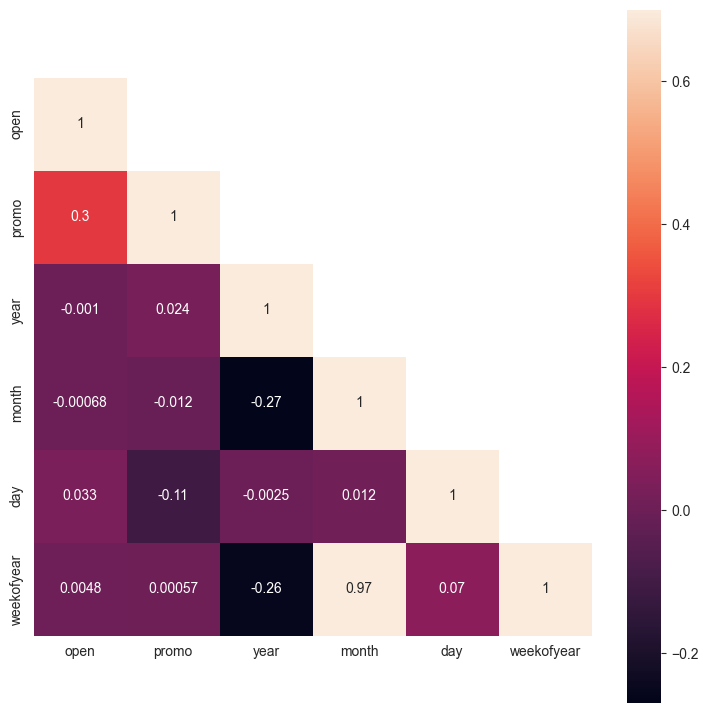

In [19]:
store_train['open'] = store_train['open'].map({'true': 1, 'false': 0})
store_train['promo'] = store_train['promo'].map({'true': 1, 'false': 0})
store_train = store_train.drop(['date'], axis=1)
numeric_features = store_train.select_dtypes(include=[np.number])
correlation_map = numeric_features.corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig, ax = plt.subplots()
fig.set_size_inches(9,9)
sns.heatmap(correlation_map, mask=obj, vmax=.7, square=True, annot=True)
plt.show()

**As we can see that in the graph given below that Stores mainly closed on Sunday**

2025-04-27 23:40:53,545 matplotlib.category INFO   Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-27 23:40:54,102 matplotlib.category INFO   Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<Axes: xlabel='dayofweek', ylabel='count'>

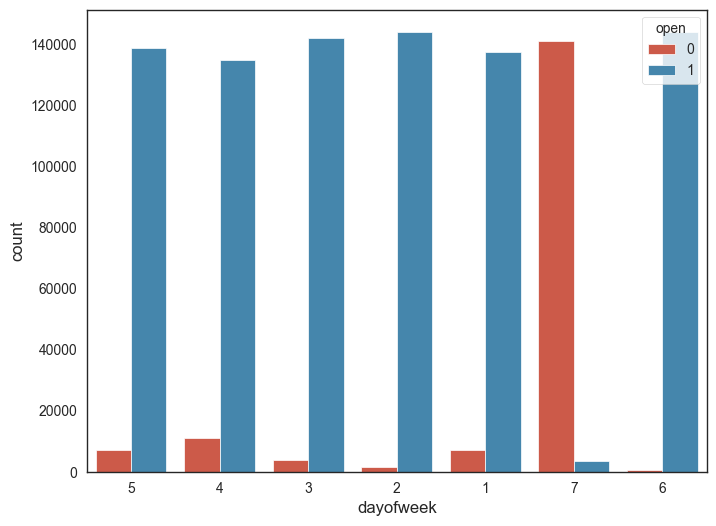

In [20]:
sns.countplot(x='dayofweek',hue='open',data=store_train)

**Sales Are nearly doubled High When Promo is Running**

2025-04-27 23:40:55,399 matplotlib.category INFO   Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-27 23:40:55,405 matplotlib.category INFO   Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


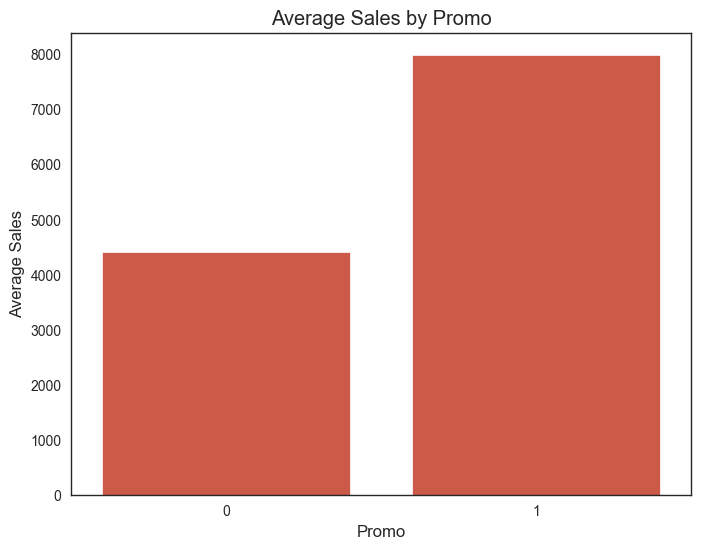

In [21]:
#Impact of promo on sales
store_train['sales'] = pd.to_numeric(store_train['sales'], errors='coerce')

Promo_sales = pd.DataFrame(store_train.groupby('promo').agg({'sales':'mean'}))

sns.barplot(x=Promo_sales.index, y=Promo_sales['sales'])
plt.xlabel('Promo')
plt.ylabel('Average Sales')
plt.title('Average Sales by Promo')
plt.show()

**As We can see that In the month of November and Specially in December Sales is increasing Rapidly every year on the christmas eve.**

2025-04-27 23:40:56,675 matplotlib.category INFO   Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-27 23:40:57,269 matplotlib.category INFO   Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


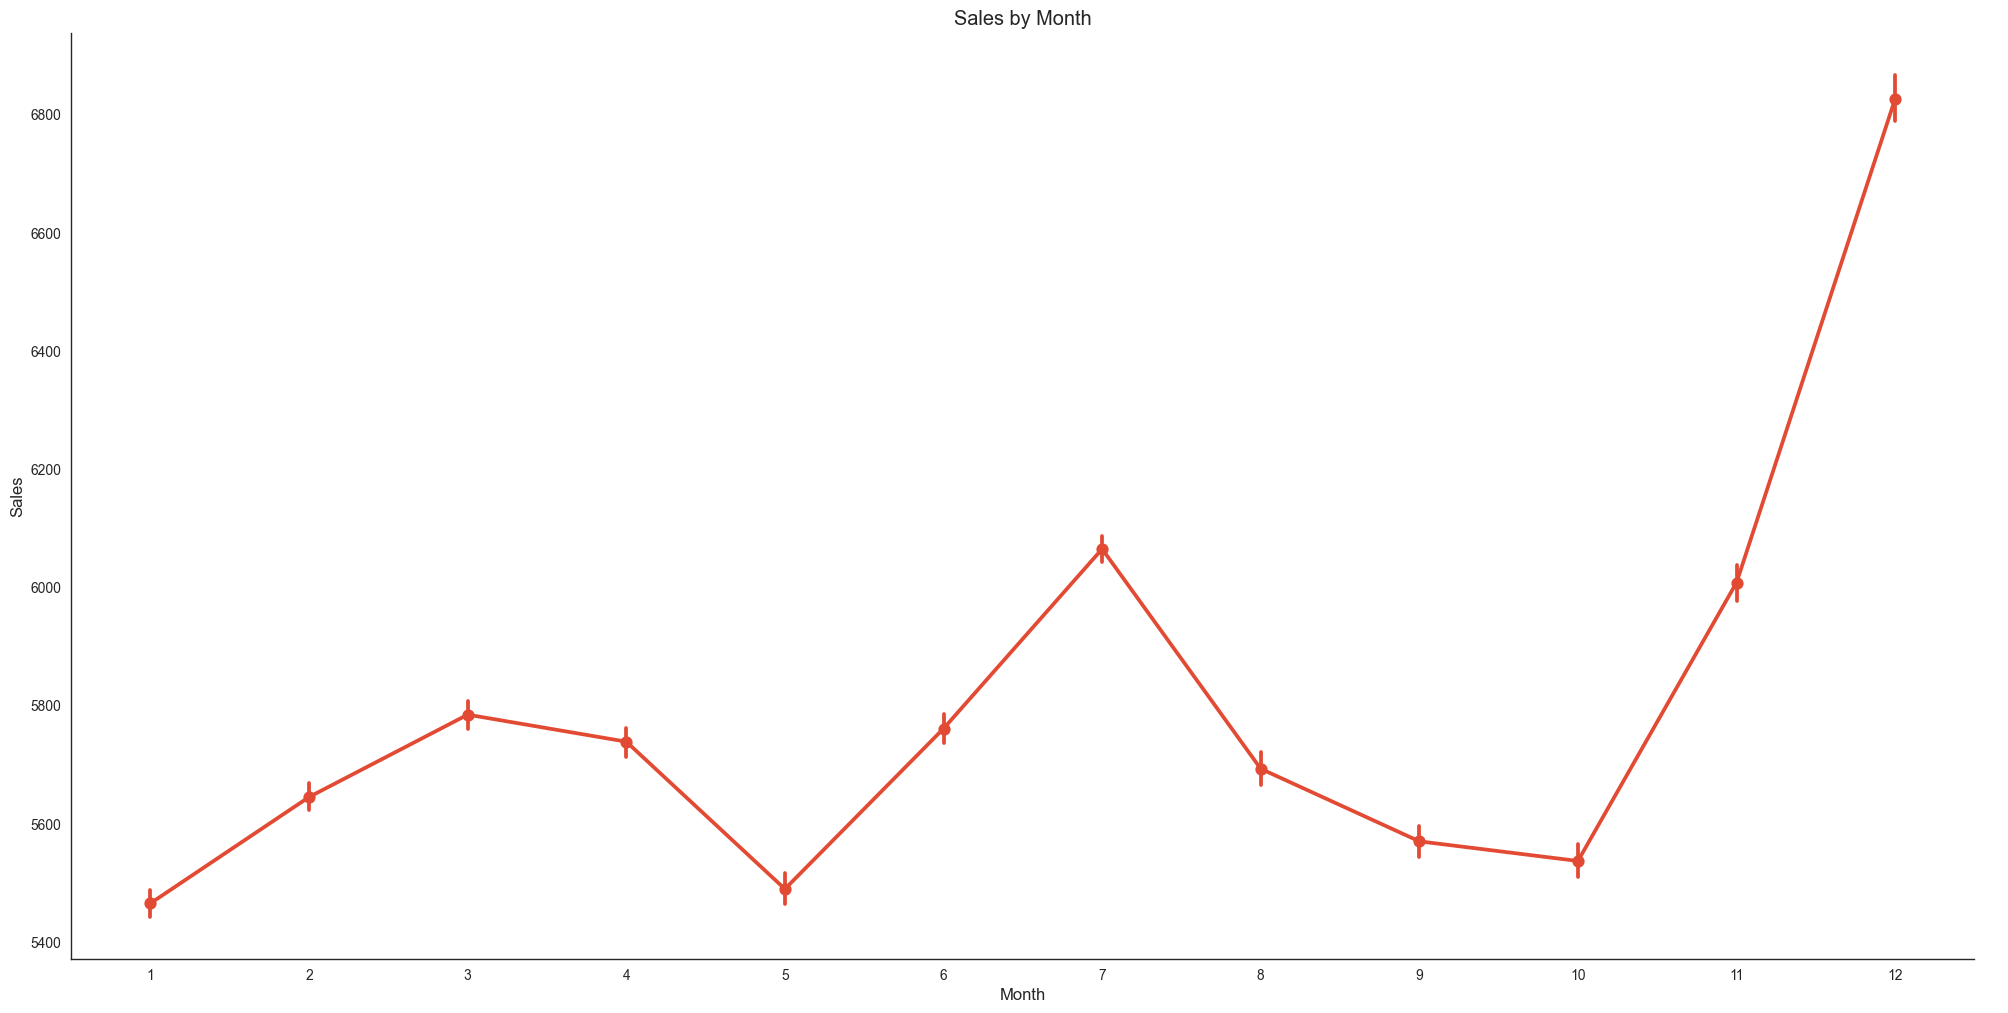

In [22]:
sns.catplot(x="month", y="sales", data=store_train, kind="point", aspect=2, height=10)

plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales by Month')
plt.show()

In [23]:
# Value Counts of SchoolHoliday Column
store_train.schoolholiday.value_counts()

schoolholiday
0    835488
1    181721
Name: count, dtype: int64

**As we can see in the Piechart Sales affected by School Holiday is 18% and Mainly Sales aren't afffected by School Holiday**

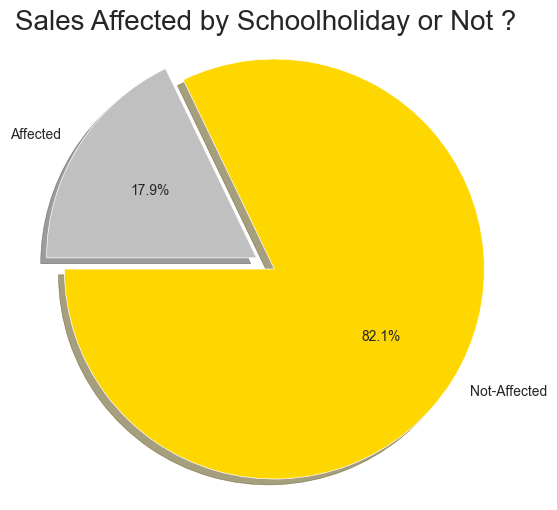

In [24]:
labels = 'Not-Affected' , 'Affected'
sizes = store_train.schoolholiday.value_counts()
colors = ['gold', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()


### **Transforming Variable StateHoliday**

**As we can see in the Piechart Sales affected by State Holiday is only 3% means Sales aren't afffected by State Holiday**

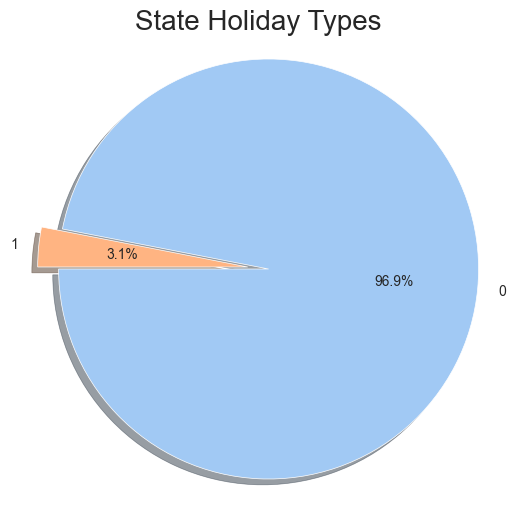

In [25]:
sizes = store_train['stateholiday'].value_counts()
labels = sizes.index
colors = sns.color_palette('pastel')[0:len(labels)]
explode = [0.1] + [0 for _ in range(len(labels)-1)]

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=180)
ax.axis('equal')
plt.title("State Holiday Types", fontsize=20)
fig.set_size_inches(6,6)
plt.show()

**As Sales isn't much affected by State Holiday so i'm removing this column**

In [26]:
store_train.drop('stateholiday',inplace=True,axis=1)

**Histogram Representation of Sales. Here 0 is showing because most of the time store was closed.**

/var/folders/4p/r3zy7pns7t38_zwr2sjgxj8c0000gp/T/ipykernel_85617/1536171744.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(store_train['sales'], kde = False,bins=40);


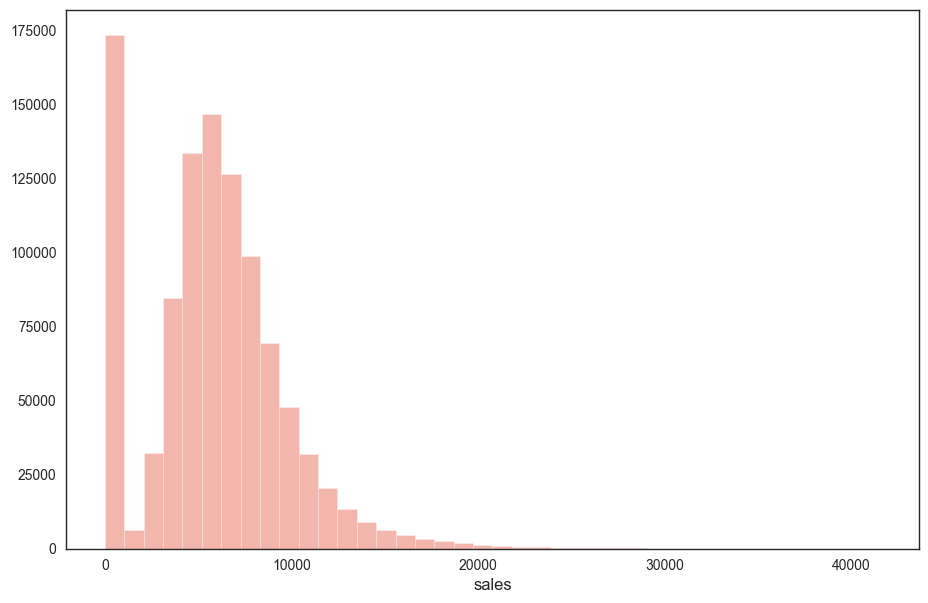

In [27]:
#distribution of sales
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.distplot(store_train['sales'], kde = False,bins=40);

**Sales vs Customers**

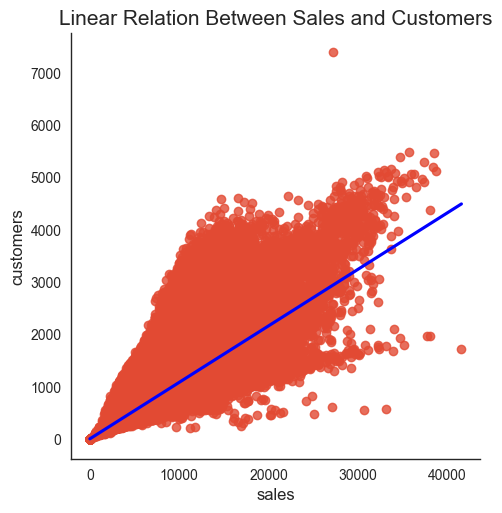

In [28]:
store_train['sales'] = pd.to_numeric(store_train['sales'], errors='coerce')
store_train['customers'] = pd.to_numeric(store_train['customers'], errors='coerce')

sns.lmplot(x='sales', y='customers', data=store_train, palette='seismic', height=5, aspect=1, line_kws={'color':'blue'})

plt.title('Linear Relation Between Sales and Customers', fontsize=15)
plt.show()

## **Analysing the Store Dataset**

In [29]:
store.head(5)

,store,storetype,assortment,competitiondistance,competitionopensincemonth,competitionopensinceyear,promo2,promo2sinceweek,promo2sinceyear,promointerval
0,1,c,a,1270,9,2008,false,None,None,None
1,2,a,a,570,11,2007,true,13,2010,"Jan,Apr,Jul,Oct"
2,3,a,a,14130,12,2006,true,14,2011,"Jan,Apr,Jul,Oct"
3,4,c,c,620,9,2009,false,None,None,None
4,5,a,a,29910,4,2015,false,None,None,None


In [30]:
store.tail()

,store,storetype,assortment,competitiondistance,competitionopensincemonth,competitionopensinceyear,promo2,promo2sinceweek,promo2sinceyear,promointerval
1110,1111,a,a,1900,6,2014,true,31,2013,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880,4,2006,false,None,None,None
1112,1113,a,c,9260,None,None,false,None,None,None
1113,1114,a,c,870,None,None,false,None,None,None
1114,1115,d,c,5350,None,None,true,22,2012,"Mar,Jun,Sept,Dec"


##### **Checking Information about Dataset**

In [31]:
store.shape

(1115, 10)

In [32]:
#Checking info of data as data types and rows and cols
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   store                      1115 non-null   object
 1   storetype                  1115 non-null   object
 2   assortment                 1115 non-null   object
 3   competitiondistance        1112 non-null   object
 4   competitionopensincemonth  761 non-null    object
 5   competitionopensinceyear   761 non-null    object
 6   promo2                     1115 non-null   object
 7   promo2sinceweek            571 non-null    object
 8   promo2sinceyear            571 non-null    object
 9   promointerval              571 non-null    object
dtypes: object(10)
memory usage: 87.2+ KB


In [33]:
#Checking Null Values
store.isnull().sum()

store                          0
storetype                      0
assortment                     0
competitiondistance            3
competitionopensincemonth    354
competitionopensinceyear     354
promo2                         0
promo2sinceweek              544
promo2sinceyear              544
promointerval                544
dtype: int64

**Heatmap for null values**

<Axes: >

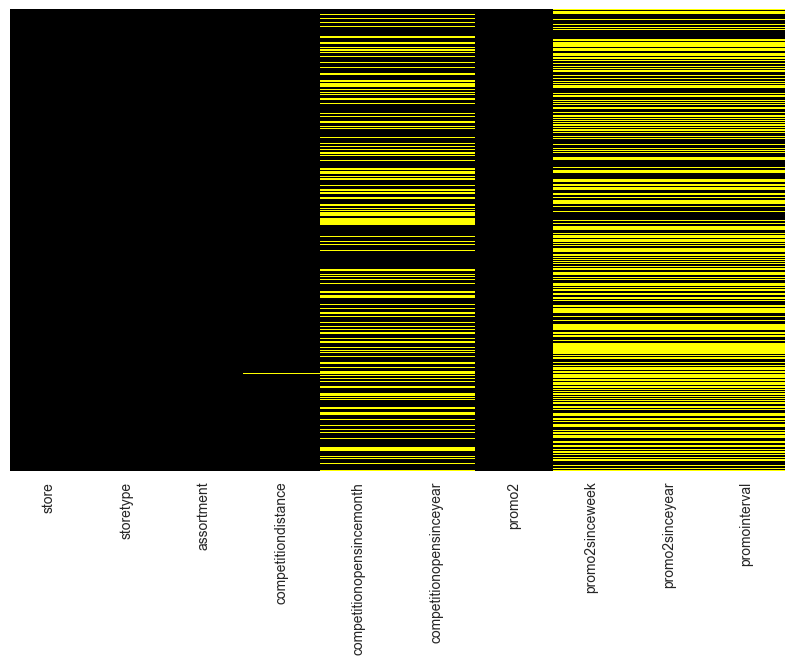

In [34]:
# creating heatmap for null values
plt.figure(figsize=(10,6))
sns.heatmap(store.isnull(),yticklabels= False, cbar= False, cmap= 'gnuplot')

**Distribution Of Different Store Types**

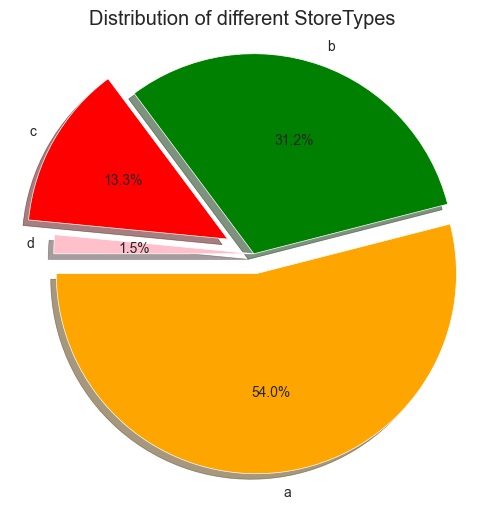

In [35]:
labels = 'a' , 'b' , 'c' , 'd'
sizes = store.storetype.value_counts()
colors = ['orange', 'green' , 'red' , 'pink']
explode = (0.1, 0.0 , 0.15 , 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Distribution of different StoreTypes")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()


### **Remove features with high percentages of missing values**

#### **we can see that some features have a high percentage of missing values and they won't be accurate as indicators, so we will remove features with more than 30% missing values.**

In [36]:
# remove features
store = store.drop(['competitionopensincemonth', 'competitionopensinceyear','promo2sinceweek',
                     'promo2sinceyear', 'promointerval'], axis=1)

#### **Replace missing values in features with low percentages of missing values**

/var/folders/4p/r3zy7pns7t38_zwr2sjgxj8c0000gp/T/ipykernel_85617/1933368162.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(store.competitiondistance.dropna())


Text(0.5, 1.0, 'Distributin of Store Competition Distance')

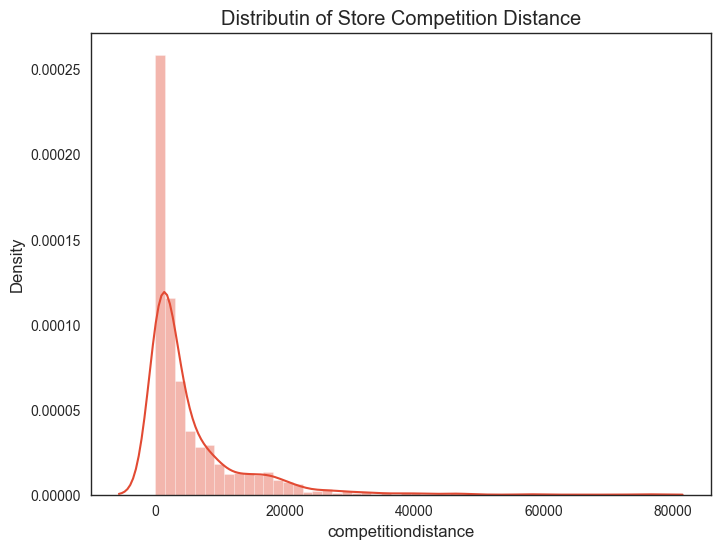

In [37]:
# CompetitionDistance is distance in meters to the nearest competitor store
# let's first have a look at its distribution

sns.distplot(store.competitiondistance.dropna())
plt.title("Distributin of Store Competition Distance")

#### **The distribution is right skewed, so we'll replace missing values with the median.**

In [38]:
# replace missing values in CompetitionDistance with median for the store dataset

store.competitiondistance.fillna(store.competitiondistance.median(), inplace=True)

**Pairplot for Store Dataset**

**Checking stores with their assortment type**

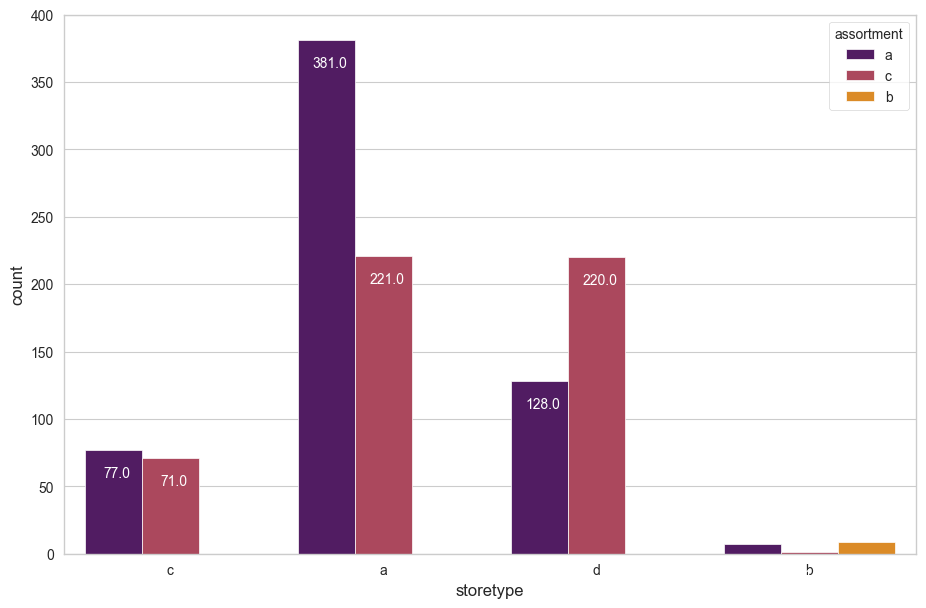

In [39]:
#checking stores with their assortment type 
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
store_type=sns.countplot(x='storetype',hue='assortment', data=store,palette="inferno")

for p in store_type.patches:
    store_type.annotate(f'\n{p.get_height()}', (p.get_x()+0.15, p.get_height()),ha='center', va='top', color='white', size=10)

***We can see that there is not such significant differences in these 3 years in terms of sales.*** 

2025-04-27 23:42:50,237 matplotlib.category INFO   Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-27 23:42:50,849 matplotlib.category INFO   Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


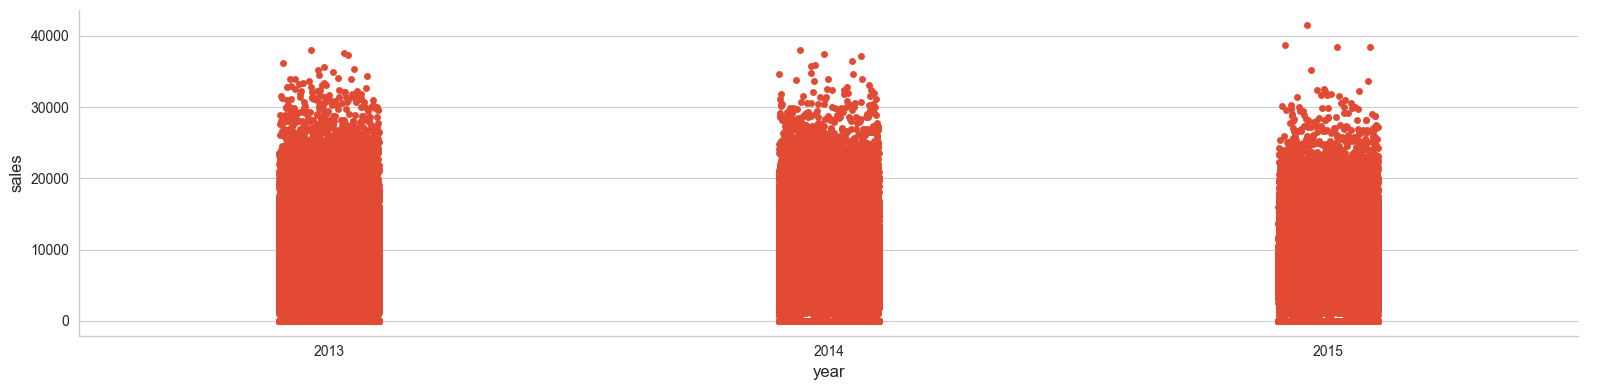

In [40]:
#plotting year vs sales
sns.catplot(x='year',y='sales',data=store_train, height=4, aspect=4 );

### **Merging Two Datasets**

In [41]:
train = pd.merge(store_train, store, on='store', how='left')
train.head()

test = pd.merge(store_test, store, on='store', how='left')

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   id                   1017209 non-null  object
 1   store                1017209 non-null  object
 2   dayofweek            1017209 non-null  object
 3   sales                1017209 non-null  int64 
 4   customers            1017209 non-null  int64 
 5   open                 1017209 non-null  int64 
 6   promo                1017209 non-null  int64 
 7   schoolholiday        1017209 non-null  object
 8   year                 1017209 non-null  int64 
 9   month                1017209 non-null  int64 
 10  day                  1017209 non-null  int64 
 11  weekofyear           1017209 non-null  int64 
 12  storetype            1017209 non-null  object
 13  assortment           1017209 non-null  object
 14  competitiondistance  1017209 non-null  object
 15  promo2         

## **EDA On Merged Dataset**

#### **Heatmap Of Merged Dataset**

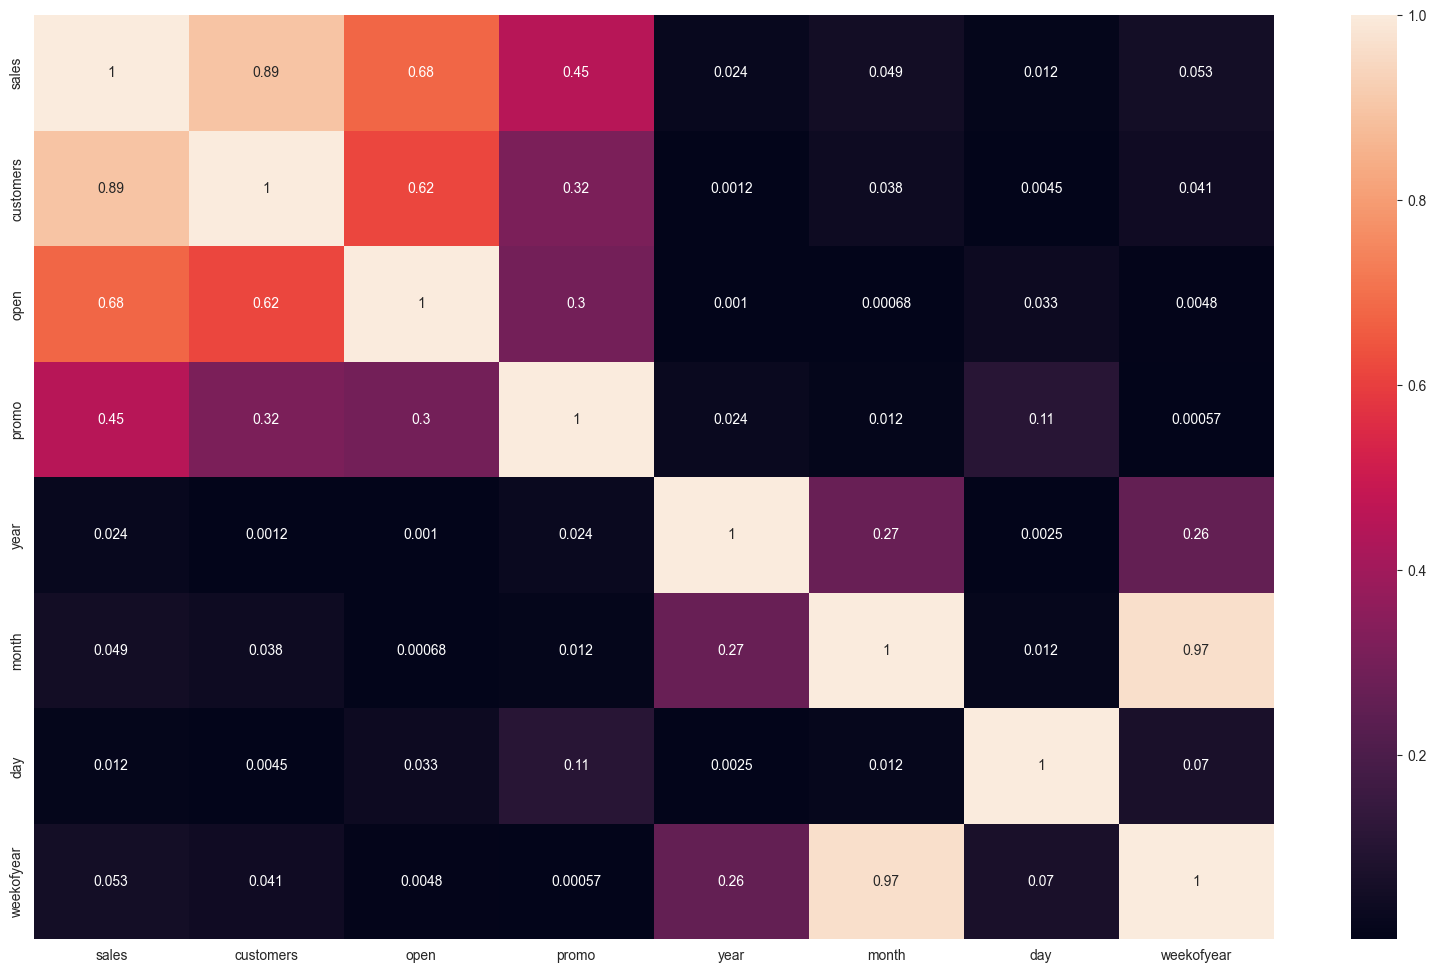

In [43]:
numeric_columns = train.select_dtypes(include=[np.number])

corr_matrix = numeric_columns.corr().abs()

plt.subplots(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [44]:
train["avg_customer_sales"] = train.sales/train.customers

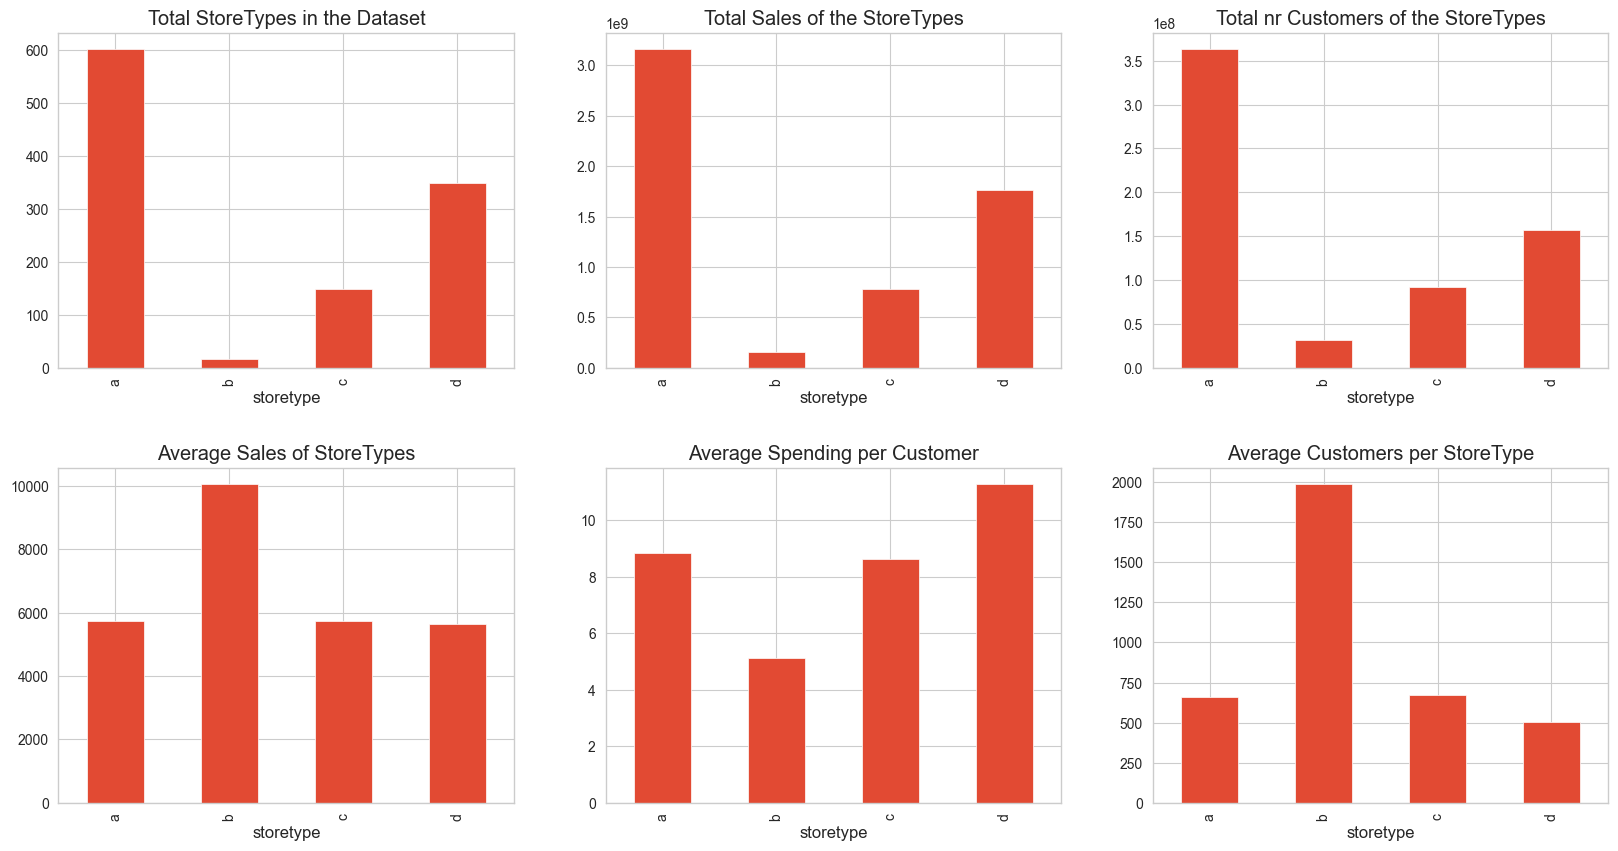

In [45]:
f, ax = plt.subplots(2, 3, figsize = (20,10))

store.groupby("storetype")["store"].count().plot(kind = "bar", ax = ax[0, 0], title = "Total StoreTypes in the Dataset")
train.groupby("storetype")["sales"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total Sales of the StoreTypes")
train.groupby("storetype")["customers"].sum().plot(kind = "bar", ax = ax[0,2], title = "Total nr Customers of the StoreTypes")
train.groupby("storetype")["sales"].mean().plot(kind = "bar", ax = ax[1,0], title = "Average Sales of StoreTypes")
train.groupby("storetype")["avg_customer_sales"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Spending per Customer")
train.groupby("storetype")["customers"].mean().plot(kind = "bar", ax = ax[1,2], title = "Average Customers per StoreType")

plt.subplots_adjust(hspace = 0.3)
plt.show()

**As we can see from the graphs, the StoreType A has the most stores, sales and customers. However the StoreType D has the best averages spendings per customers. StoreType B, with only 17 stores has the most average customers.**

#### **Lets go ahead with the promotions**

2025-04-27 23:43:00,868 matplotlib.category INFO   Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-27 23:43:01,858 matplotlib.category INFO   Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


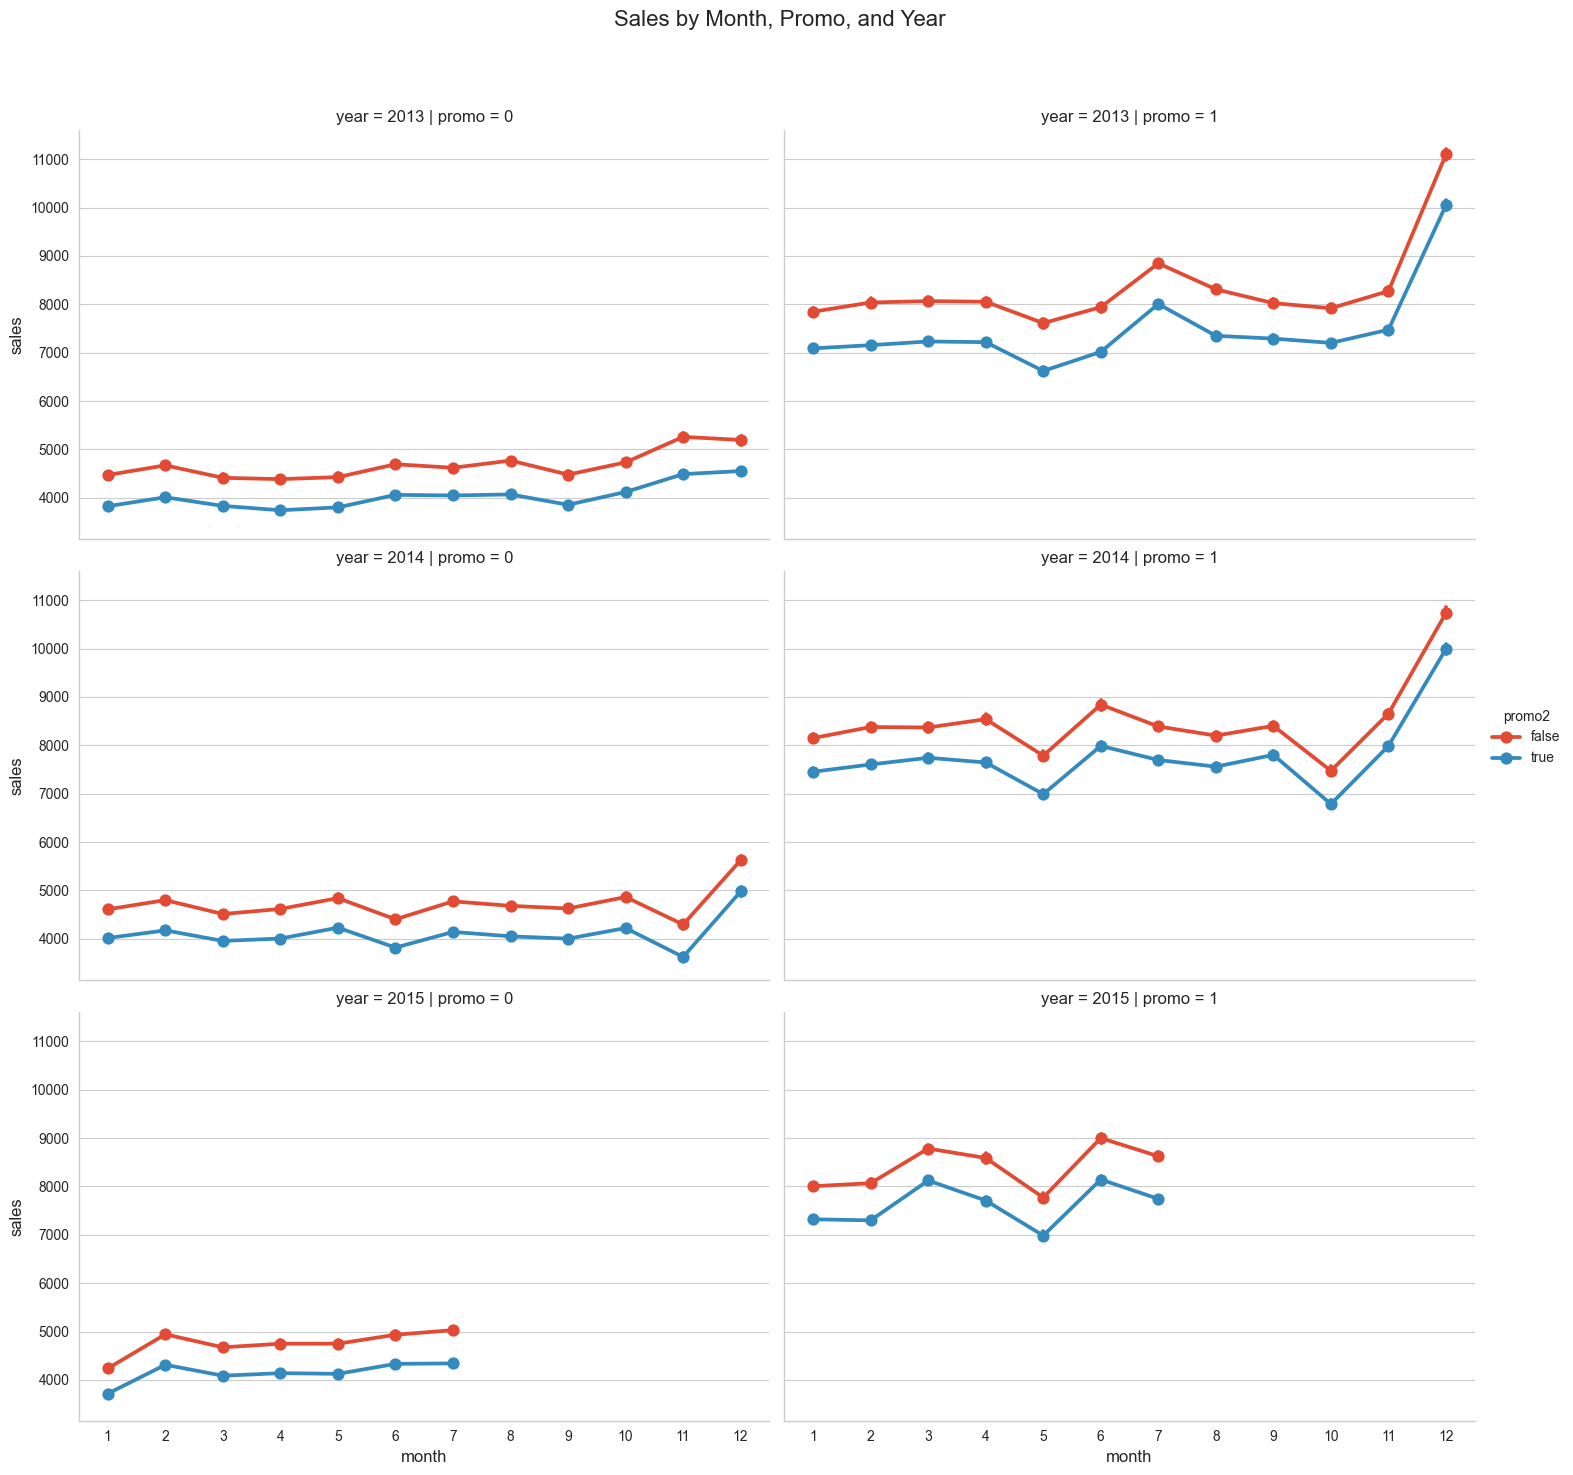

In [46]:
sns.catplot(data=train, x="month", y="sales", 
            col='promo', # per store type in cols
            hue='promo2', 
            row="year", 
            kind="point", 
            height=5, aspect=1.5)

plt.subplots_adjust(top=0.9)
plt.suptitle("Sales by Month, Promo, and Year", fontsize=16)

plt.show()
# So, of course, if the stores are having promotion the sells are higher.
# Overall the store promotions sellings are also higher than the seasionality promotions (Promo2). However I can't see no yearly trend. 

**As We can see that when the promo is running Sales are high**

2025-04-27 23:43:21,918 matplotlib.category INFO   Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-27 23:43:22,562 matplotlib.category INFO   Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


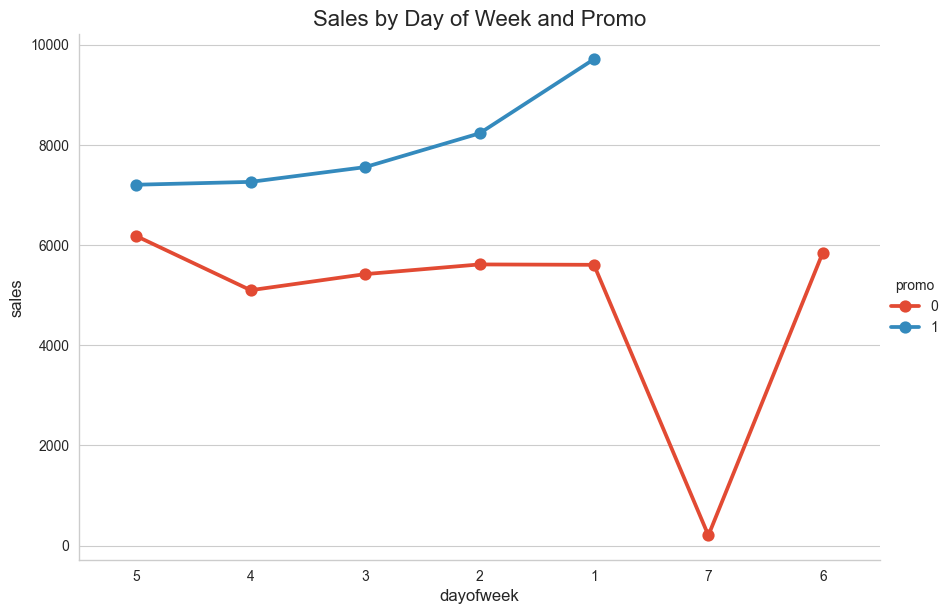

In [47]:
sns.catplot(data=train, x="dayofweek", y="sales", hue="promo", kind="point", height=6, aspect=1.5)

plt.title("Sales by Day of Week and Promo", fontsize=16)
plt.show()

In [48]:
print("""So, no promotion in the weekend. However, the sales are very high, if the stores have promotion. 
The Sales are going crazy on Sunday. No wonder.""")
print("There are", train[(train.open == 1) & (train.dayofweek == '7')].store.unique().shape[0], "stores opend on sundays")    

So, no promotion in the weekend. However, the sales are very high, if the stores have promotion. 
The Sales are going crazy on Sunday. No wonder.
There are 33 stores opend on sundays


**Let's see the trends on a yearly basis.**

2025-04-27 23:43:36,227 matplotlib.category INFO   Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-27 23:43:37,129 matplotlib.category INFO   Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


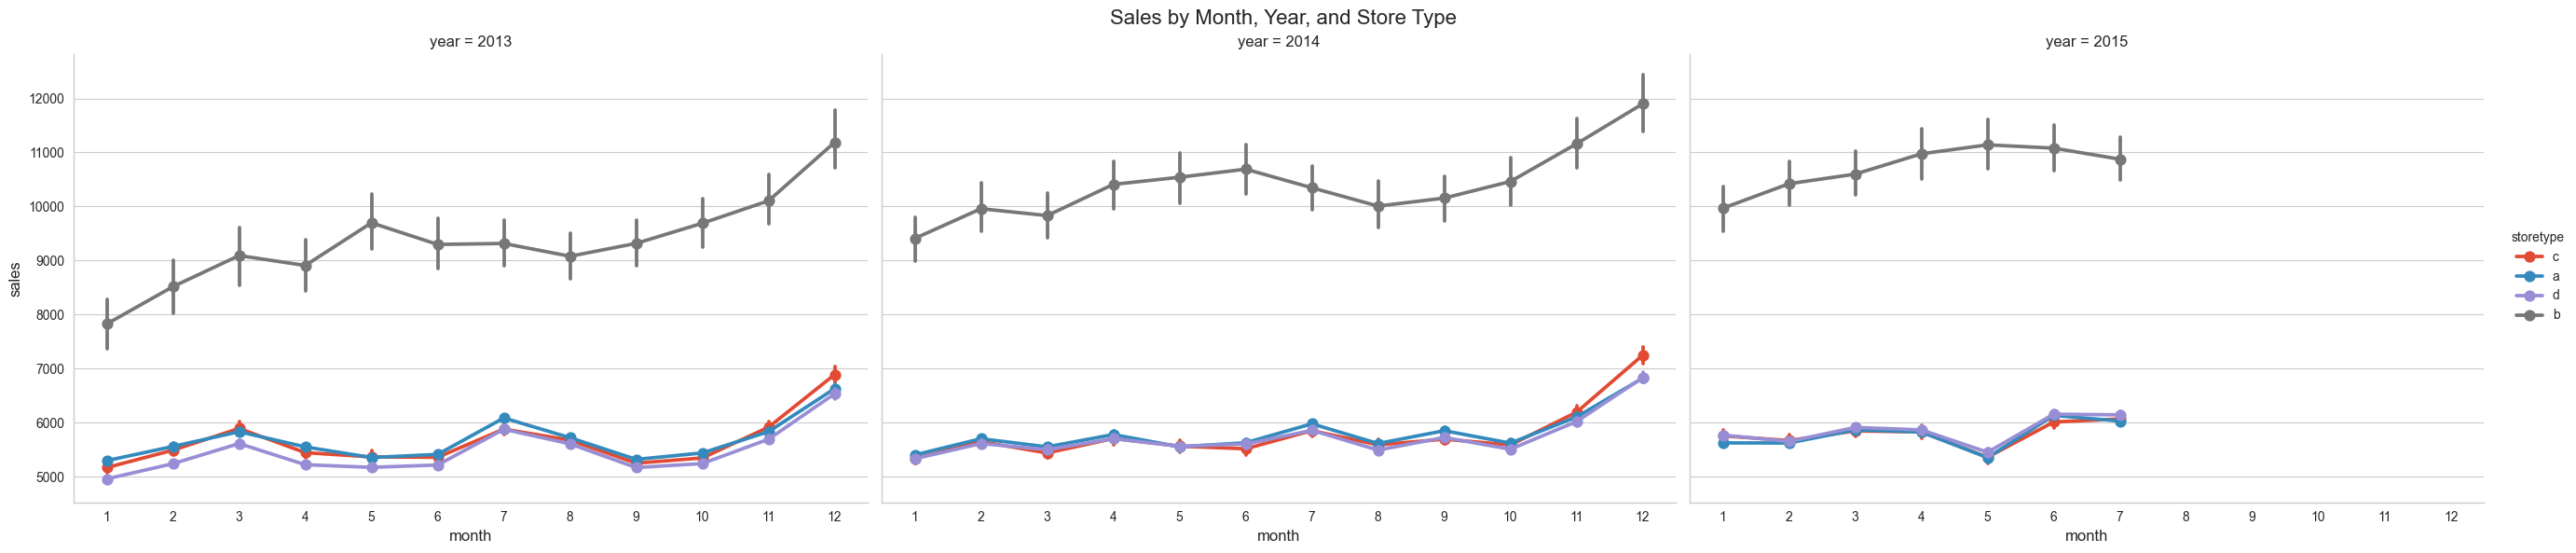

In [49]:
sns.catplot(data=train, x="month", y="sales", col="year", hue="storetype", kind="point", height=6, aspect=1.5)

plt.subplots_adjust(top=0.9)
plt.suptitle("Sales by Month, Year, and Store Type", fontsize=16)

plt.show()
# Yes, we can see a seasonalities, but not trends. The sales stays constantly yearly. 

In [50]:
train['competitiondistance'].isna().sum()

0

**What about the Competition Distance. What kind of inpact does this have on the sales.**

In [51]:
train = train.dropna(subset=['competitiondistance'])
train['competitiondistance'] = pd.to_numeric(train['competitiondistance'], errors='coerce')
# The obsverations are continous numbers, so we need to convert them into a categories. Lets a create a new variable.
train["competitiondistance_cat"] = pd.cut(train["competitiondistance"], bins=5)

print(train['competitiondistance_cat'].head())

0     (-55.84, 15188.0]
1     (-55.84, 15188.0]
2    (15188.0, 30356.0]
3     (-55.84, 15188.0]
4    (15188.0, 30356.0]
Name: competitiondistance_cat, dtype: category
Categories (5, interval[float64, right]): [(-55.84, 15188.0] < (15188.0, 30356.0] < (30356.0, 45524.0] < (45524.0, 60692.0] < (60692.0, 75860.0]]


/var/folders/4p/r3zy7pns7t38_zwr2sjgxj8c0000gp/T/ipykernel_85617/3843378168.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train.groupby(by = "competitiondistance_cat").sales.mean().plot(kind = "bar", title = "Average Total Sales by Competition Distance", ax = ax[0])
/var/folders/4p/r3zy7pns7t38_zwr2sjgxj8c0000gp/T/ipykernel_85617/3843378168.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train.groupby(by = "competitiondistance_cat").customers.mean().plot(kind = "bar", title = "Average Total Customers by Competition Distance", ax = ax[1])


<Axes: title={'center': 'Average Total Customers by Competition Distance'}, xlabel='competitiondistance_cat'>

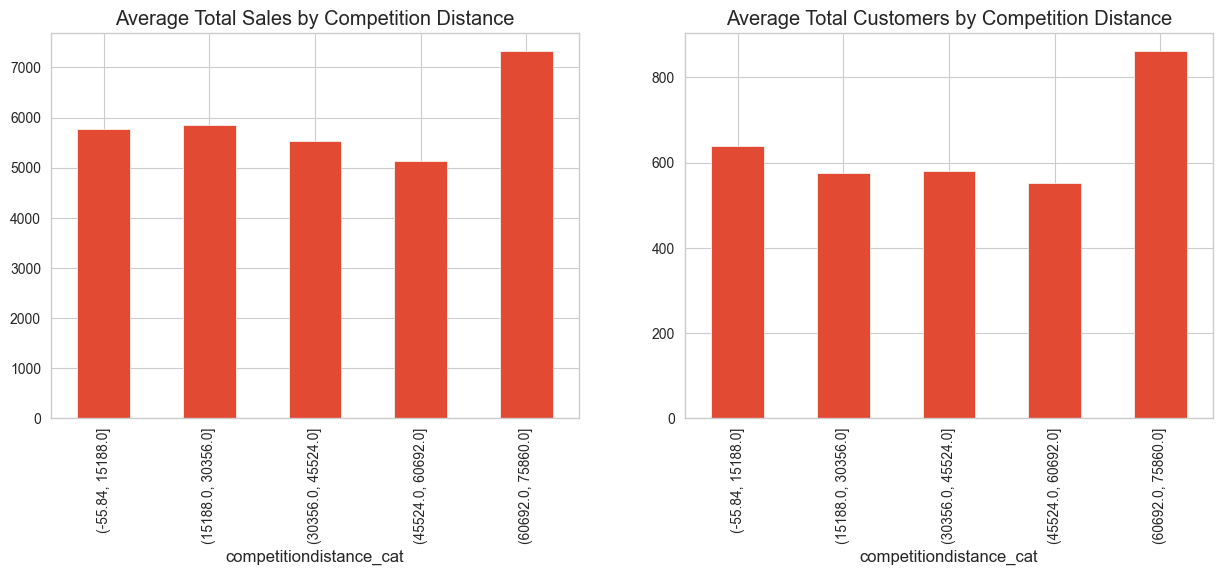

In [52]:
f, ax = plt.subplots(1,2, figsize = (15,5))

train.groupby(by = "competitiondistance_cat").sales.mean().plot(kind = "bar", title = "Average Total Sales by Competition Distance", ax = ax[0])
train.groupby(by = "competitiondistance_cat").customers.mean().plot(kind = "bar", title = "Average Total Customers by Competition Distance", ax = ax[1])

# It is pretty clear. If the competions is very far away, the stores are performing better (sales and customers)

In [53]:
train.drop(['avg_customer_sales','competitiondistance_cat'],axis=1,inplace=True)

**Box plot shows that we have a very high outliers in sales**

<Axes: ylabel='sales'>

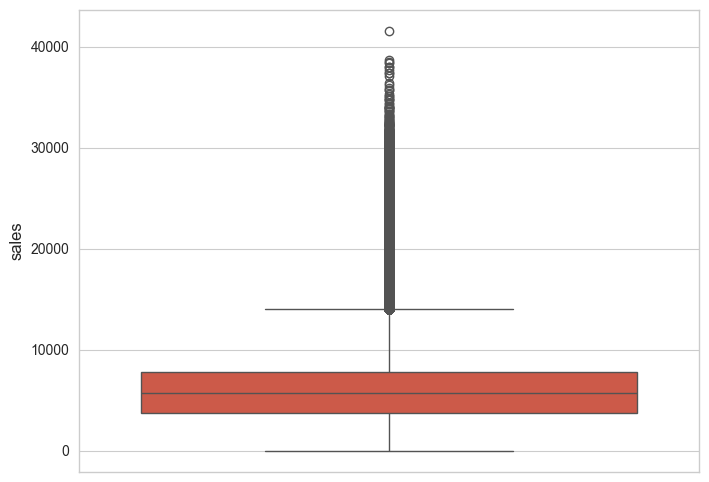

In [54]:
#checking outliers in sales
sns.boxplot(train['sales'])

**Removing Outliers Of Sales Column**

In [55]:
#removing outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [56]:
# defining new variable after removing outliers
train= remove_outlier(train, 'sales')

# **Conclusion of the analysis:**
 
**Sales are highly correlated to number of Customers.**
 
**The most selling and crowded store type is A.**
 
**StoreType B has the lowest Average Sales per Customer. So i think customers visit this type only for small things.**
 
**StoreTybe D had the highest buyer cart.**
 
**Promo runs only in weekdays.**
 
**For all stores, Promotion leads to increase in Sales and Customers both.**
 
**More stores are opened during School holidays than State holidays.**
 
**The stores which are opened during School Holiday have more sales than normal days.**
 
**Sales are increased during Chirstmas week, this might be due to the fact that people buy more beauty products during a Christmas celebration.**
 
**Promo2 doesnt seems to be correlated to any significant change in the sales amount.**
 
**Absence of values in features CompetitionOpenSinceYear/Month doesn’t indicate the absence of competition as CompetitionDistance values are not null where the other two values are null.**

### **Drop Subsets Of Data Where Might Cause Bias**

In [57]:
# where stores are closed, they won't generate sales, so we will remove that part of the dataset
train = train[train.open != 0]

In [58]:
# Open isn't a variable anymore, so we'll drop it too
train = train.drop('open', axis=1)

In [59]:
# Check if there's any opened store with zero sales
train['store'] = pd.to_numeric(train['store'], errors='coerce')
train[train.sales == 0]['store'].sum()

31460

In [60]:
# see the percentage of open stored with zero sales
train[train.sales == 0]['sales'].sum()/train.sales.sum()

0.0

In [61]:
# remove this part of data to avoid bias
train = train[train.sales != 0]

In [62]:
train_new=train.copy()

In [63]:
train_new = pd.get_dummies(train_new,columns=['storetype','assortment'])

train_new['promo2'] = train_new['promo2'].replace({'true': 1, 'false': 0})

train_new['storetype_a'] = train_new['storetype_a'].replace({True: 1, False: 0})
train_new['storetype_b'] = train_new['storetype_b'].replace({True: 1, False: 0})
train_new['storetype_c'] = train_new['storetype_c'].replace({True: 1, False: 0})
train_new['storetype_d'] = train_new['storetype_d'].replace({True: 1, False: 0})

train_new['assortment_a'] = train_new['assortment_a'].replace({True: 1, False: 0})
train_new['assortment_b'] = train_new['assortment_b'].replace({True: 1, False: 0})
train_new['assortment_c'] = train_new['assortment_c'].replace({True: 1, False: 0})

In [64]:
train_new.head()

,id,store,dayofweek,sales,customers,promo,schoolholiday,year,month,day,weekofyear,competitiondistance,promo2,storetype_a,storetype_b,storetype_c,storetype_d,assortment_a,assortment_b,assortment_c
0,0,1,5,5263,555,1,1,2015,7,31,31,1270.0,0,0,0,1,0,1,0,0
1,9,10,5,7185,681,1,1,2015,7,31,31,3160.0,0,1,0,0,0,1,0,0
2,99,100,5,10280,764,1,0,2015,7,31,31,17930.0,0,0,0,0,1,1,0,0
3,999,1000,5,8935,749,1,0,2015,7,31,31,2230.0,1,1,0,0,0,0,0,1
4,1000,1001,5,7724,764,1,1,2015,7,31,31,19640.0,1,0,0,1,0,1,0,0


**From plot it can be sen that most of the sales have been on 1st and last day of week**

2025-04-27 23:44:01,679 matplotlib.category INFO   Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


/var/folders/4p/r3zy7pns7t38_zwr2sjgxj8c0000gp/T/ipykernel_85617/221677450.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dayofweek', y='sales', data=train_new, palette=colors)


2025-04-27 23:44:02,307 matplotlib.category INFO   Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


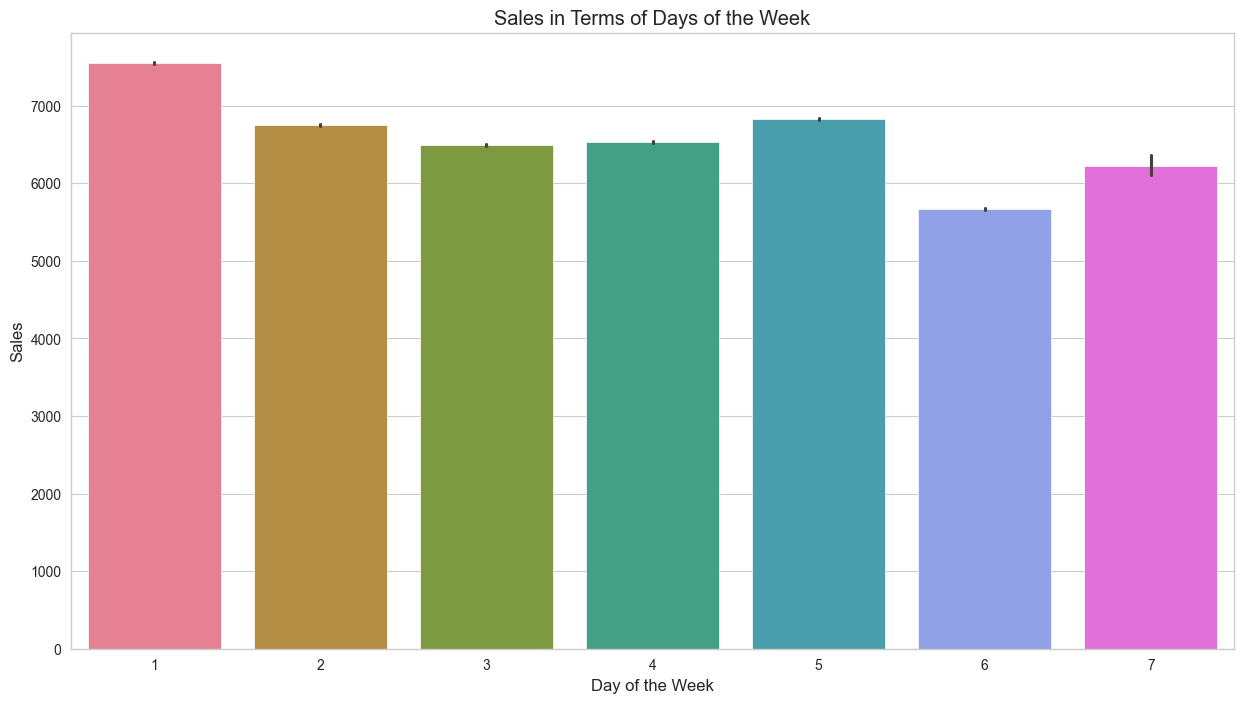

In [65]:
train_new['dayofweek'] = pd.to_numeric(train_new['dayofweek'], errors='coerce')

colors = sns.color_palette("husl", 7)  # 7 unique colors for 7 days

plt.figure(figsize=(15, 8))
sns.barplot(x='dayofweek', y='sales', data=train_new, palette=colors)

plt.xlabel('Day of the Week')
plt.ylabel('Sales')
plt.title('Sales in Terms of Days of the Week')
plt.show()

#### **Setting Features and Target Variables**

In [66]:
X = train_new.drop(['sales', 'store', 'year'] , axis = 1)
y= train_new.sales

In [67]:
X.shape

(817644, 17)

In [68]:
X.head()

,id,dayofweek,customers,promo,schoolholiday,month,day,weekofyear,competitiondistance,promo2,storetype_a,storetype_b,storetype_c,storetype_d,assortment_a,assortment_b,assortment_c
0,0,5,555,1,1,7,31,31,1270.0,0,0,0,1,0,1,0,0
1,9,5,681,1,1,7,31,31,3160.0,0,1,0,0,0,1,0,0
2,99,5,764,1,0,7,31,31,17930.0,0,0,0,0,1,1,0,0
3,999,5,749,1,0,7,31,31,2230.0,1,1,0,0,0,0,0,1
4,1000,5,764,1,1,7,31,31,19640.0,1,0,0,1,0,1,0,0


In [69]:
X.head()

,id,dayofweek,customers,promo,schoolholiday,month,day,weekofyear,competitiondistance,promo2,storetype_a,storetype_b,storetype_c,storetype_d,assortment_a,assortment_b,assortment_c
0,0,5,555,1,1,7,31,31,1270.0,0,0,0,1,0,1,0,0
1,9,5,681,1,1,7,31,31,3160.0,0,1,0,0,0,1,0,0
2,99,5,764,1,0,7,31,31,17930.0,0,0,0,0,1,1,0,0
3,999,5,749,1,0,7,31,31,2230.0,1,1,0,0,0,0,0,1
4,1000,5,764,1,1,7,31,31,19640.0,1,0,0,1,0,1,0,0


In [70]:
y.head()

0     5263
1     7185
2    10280
3     8935
4     7724
Name: sales, dtype: int64

Splitting Dataset Into Training Set and Test Set

In [141]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [142]:
columns=X_train.columns

## **Implementing Supervised Machine Learning algorithms.**

## **1.  Linear Regression (OLS)**

In [143]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import joblib

# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

joblib.dump(regressor, 'linear_regression_model.pkl')

LinearRegression()

In [145]:
regressor.intercept_

-1261.9948738977291

In [146]:
regressor.coef_

array([ 0.00000000e+00, -4.30458566e+02, -1.30800210e+02,  3.07044324e+04,
        1.08773617e+03,  2.89842829e+01,  3.32821290e+02,  2.04935081e+01,
       -1.81289700e+02,  1.81895671e+03,  3.11228376e+02,  3.22762746e+02,
       -1.91396262e+03,  1.73275793e+02,  1.41792408e+03,  1.43821699e+03,
       -3.16549492e+03,  1.72727793e+03])

In [147]:
y_pred_train = regressor.predict(X_train)

In [148]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [149]:
def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# definte MAPE function
def mape(x, y): 
    return np.mean(np.abs((x - y) / x)) * 100

print("Training RMSE", ":", rmse(y_train, y_pred_train),
      "Testing RMSE", ":", rmse(y_test, y_pred))
print("Training MAPE", ":", mape(y_train, y_pred_train),
      "Testing MAPE", ":", mape(y_test, y_pred))

Training RMSE : 1148.5155712691585 Testing RMSE : 1145.7200607239986
Training MAPE : 14.128762809238363 Testing MAPE : 14.080610509749569


In [150]:
mean_squared_error(y_test, y_pred)

1312674.457545403

In [151]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

1145.7200607239986

In [152]:
train_score_1=regressor.score(X_train,y_train)
train_score_1

0.7837138322164259

In [153]:
test_score_1=regressor.score(X_test,y_test)
test_score_1

0.7839728422805492

In [83]:
#storing 100 observations for analysis
simple_lr_pred = y_pred[:100]
simple_lr_real = y_test[:100]
dataset_lr = pd.DataFrame({'Real':simple_lr_real,'PredictedLR':simple_lr_pred}) #storing these values into dataframe

In [84]:
#storing absolute diffrences between actual sales price and predicted
dataset_lr['diff']=(dataset_lr['Real']-dataset_lr['PredictedLR']).abs()

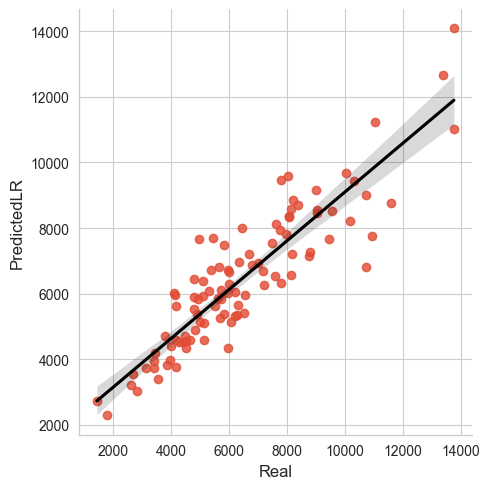

In [85]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedLR', data=dataset_lr, line_kws={'color': 'black'});

## **Inferences On Linear Regression Coefficients**

In [86]:
X = X.apply(pd.to_numeric, errors='coerce')  # Convert all columns to numeric
y = pd.to_numeric(y, errors='coerce')

In [87]:
print(X.dtypes)
print(y.dtypes)

id                       int64
dayofweek                int64
customers                int64
promo                    int64
schoolholiday            int64
month                    int64
day                      int64
weekofyear               int64
competitiondistance    float64
promo2                   int64
storetype_a              int64
storetype_b              int64
storetype_c              int64
storetype_d              int64
assortment_a             int64
assortment_b             int64
assortment_c             int64
dtype: object
int64


In [88]:
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                 1.976e+05
Date:                Sun, 27 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:44:18   Log-Likelihood:            -6.9209e+06
No. Observations:              817644   AIC:                         1.384e+07
Df Residuals:                  817628   BIC:                         1.384e+07
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -833.3709      5.867   -142.052      0.000    -844.869    -821.872
id                     -0.0004   4.34e-06    -98.138      0.000      -0.000      -0.000
dayofweek             -21.3047      0.781    -27.294      0.000     -22.835     -19.775
customers               7.2230      0.005   1479.958      0.000       7.213       7.233
promo                1088.0630      2.753    395.296      0.000    1082.668    1093.458
schoolholiday          29.3647      3.307      8.880      0.000      22.883      35.846
month                  31.1657      1.424     21.881      0.000      28.374      33.957
day                     0.6876      0.151      4.553      0.000       0.392       0.984
weekofyear             -3.7812      0.328    -11.529      0.000      -4.424      -3.138
competitiondistance     0.0240      0.000    141.247      0.000       0.024       0.024
promo2                310.4796      2.646    117.330      0.000     305.293     315.666
storetype_a           107.9113      4.771     22.619      0.000      98.561     117.262
storetype_b         -2105.0012     12.659   -166.286      0.000   -2129.812   -2080.190
storetype_c           -41.5152      5.298     -7.835      0.000     -51.900     -31.131
storetype_d          1205.2343      5.013    240.438      0.000    1195.410    1215.059
assortment_a         1164.9609      6.439    180.928      0.000    1152.341    1177.581
assortment_b        -3450.2511     15.307   -225.399      0.000   -3480.253   -3420.249
assortment_c         1451.9194      6.622    219.246      0.000    1438.940    1464.899
==============================================================================
Omnibus:                    49881.055   Durbin-Watson:                   1.724
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           152029.909
Skew:                           0.297   Prob(JB):                         0.00
Kurtosis:                       5.027   Cond. No.                     3.30e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.59e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## **2. LARS Lasso Regression**

In [89]:
las = LassoLars(alpha=0.3, fit_intercept=False)
lasreg = las.fit(X_train, y_train)

joblib.dump(lasreg, 'lasso_lars_model.pkl')

['lasso_lars_model.pkl']

In [90]:
def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# definte MAPE function
def mape(x, y): 
    return np.mean(np.abs((x - y) / x)) * 100

train_score_2=lasreg.score(X_train, y_train)
test_score_2=lasreg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_2 , "," ,
      "Out of Sample Test Score" ,":" , test_score_2)

y_predicted = lasreg.predict(X_train)
y_test_predicted = lasreg.predict(X_test)

print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.7836947208137969 , Out of Sample Test Score : 0.7839554693621043
Training RMSE : 1148.5663125136766 Testing RMSE : 1145.7661292396926
Training MAPE : 14.13336720582164 Testing MAPE : 14.085077043982677


## **3. Decision Tree Regression**

In [91]:
tree = DecisionTreeRegressor()
treereg = tree.fit(X_train, y_train)

joblib.dump(treereg, 'decision_tree_model.pkl')

['decision_tree_model.pkl']

In [92]:
train_score_3=treereg.score(X_train, y_train)
test_score_3=treereg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_3 , "," ,
      "Test Score" ,":" , test_score_3)

y_predicted = treereg.predict(X_train)
y_test_predicted = treereg.predict(X_test)
print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 1.0 , Test Score : 0.9103591312632877
Training RMSE : 0.0 Testing RMSE : 738.0357000513005
Training MAPE : 0.0 Testing MAPE : 7.733286662647336


### **Decision Tree With Hyper Parameter Tuning**

In [93]:
# #another script that takes toooo long, to find the right parameters for tree
# tree = DecisionTreeRegressor()

# params = {
#          'min_samples_split':[2,3,5,7],
#          'min_samples_leaf':[6,8,10],
#          }

# grid = RandomizedSearchCV(estimator=rfr,param_distributions=params,verbose=True,cv=10)
# #choosing 10 K-Folds makes sure i went through all of the data and didn't miss any pattern.

# grid.fit(X_train, y_train)
# grid.best_params_

 **I trained Model with hyper parameters..to not run everytime i record the result**

**Here are our best parameters for Decision Tree**

**{ min_samples_split=5,min_samples_leaf=8 }**

In [94]:
tree = DecisionTreeRegressor(min_samples_leaf=8,min_samples_split=5)
treereg = tree.fit(X_train, y_train)

joblib.dump(treereg, 'tuned_decision_tree_model.pkl')

['tuned_decision_tree_model.pkl']

In [95]:
train_score_4=treereg.score(X_train, y_train)
test_score_4=treereg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_4 , "," ,
      "Test Score" ,":" , test_score_4)

y_predicted = treereg.predict(X_train)
y_test_predicted = treereg.predict(X_test)
print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.9628553339180759 , Test Score : 0.9295688226197826
Training RMSE : 475.9603158051788 Testing RMSE : 654.1943902989904
Training MAPE : 5.03618980365554 Testing MAPE : 6.942528087053865


In [96]:
#storing 100 observations for analysis
dc_pred = y_test_predicted[:100]
dc_real = y_test[:100]
dataset_dc = pd.DataFrame({'Real':dc_real,'PredictedDC':dc_pred}) #storing these values into dataframe

In [97]:
#storing absolute diffrences between actual sales price and predicted
dataset_dc['diff']=(dataset_dc['Real']-dataset_dc['PredictedDC']).abs()

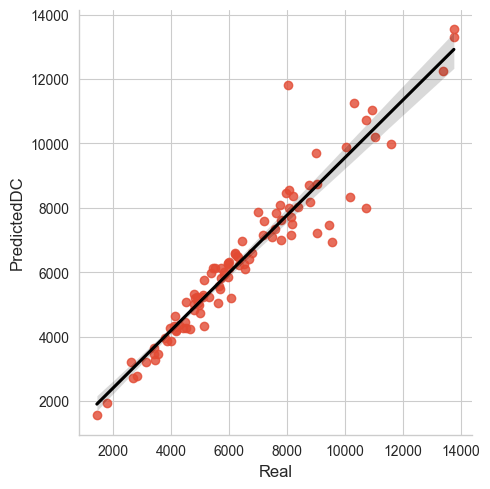

In [98]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedDC', data=dataset_dc, line_kws={'color': 'black'});

# **4. Support Vector Regression**

In [99]:
#%%time
#from sklearn.svm import SVR
#svr=SVR()
#svr_reg=svr.fit(X_train,y_train)

#joblib.dump(svr_reg, 'svr_model.pkl')

#print("Regresion Model Score" , ":" , svr_reg.score(X_train, y_train) , "," ,
#      "Out of Sample Test Score" ,":" , svr_reg.score(X_test, y_test))

#y_predicted = svr_reg.predict(X_train)
#y_test_predicted = svr_reg.predict(X_test)

#print("Training RMSE", ":", rmse(y_train, y_predicted),
#      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
#print("Training MAPE", ":", mape(y_train, y_predicted),
#      "Testing MAPE", ":", mape(y_test, y_test_predicted))

## **5. K-Nearest Neighbors Regression**

In [100]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 30)
knnreg = knn.fit(X_train, y_train)

joblib.dump(knnreg, 'knn_model.pkl')

['knn_model.pkl']

In [ ]:
#train_score_knn=knnreg.score(X_train, y_train)
#test_score_knn=knnreg.score(X_test, y_test)

print("Regresion Model Score" , ":" , knnreg.score(X_train, y_train) , "," ,
      "Out of Sample Test Score" ,":" , knnreg.score(X_test, y_test))

y_predicted = knnreg.predict(X_train)
y_test_predicted = knnreg.predict(X_test)

print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.6769432117695016 , Out of Sample Test Score : 0.651167641097711
Training RMSE : 1403.6600848568366 Testing RMSE : 1455.903948654709
Training MAPE : 18.084037703407 Testing MAPE : 18.72932102522484


### **6. Random Forest With Hyper Parameter Tuning**

In [ ]:
# #another script that takes toooo long, to find the right parameters for RFR
# rfr=RandomForestRegressor(n_jobs=-1)

# params = {
#          'n_estimators':[40,50,60,70,80,90],
#          'min_samples_split':[2,3,6,8],
#          'min_samples_leaf':[1,2,3,4],
#          'max_depth':[None,5,15,30]
#          }

# #the dimensionality is high, the number of combinations we have to search is enormous, using RandomizedSearchCV is a better option then GridSearchCV
# grid = RandomizedSearchCV(estimator=rfr,param_distributions=params,verbose=True,cv=10)

# #choosing 10 K-Folds makes sure i went through all of the data and didn't miss any pattern.
# grid.fit(X_train, y_train)
# grid.best_params_

 **I trained Model with hyper parameters..to not run everytime i record the result**

**Here are our best parameters for Random Forest**

**{ n_estimators=80,min_samples_split=2,min_samples_leaf=1,max_depth=None }**

In [102]:
#%%time
rdf = RandomForestRegressor(n_estimators=80,min_samples_split=2, min_samples_leaf=1,max_depth=None,n_jobs=-1)
rdfreg = rdf.fit(X_train, y_train)

joblib.dump(rdfreg, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [103]:
train_score_5=rdfreg.score(X_train, y_train)
test_score_5=rdfreg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_5 , "," ,
      "Test Score" ,":" , test_score_5)   

y_predicted_2 = rdfreg.predict(X_train)
y_test_predicted_2 = rdfreg.predict(X_test)

print("Training RMSE", ":", rmse(y_train, y_predicted_2),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted_2))
print("Training MAPE", ":", mape(y_train, y_predicted_2),
      "Testing MAPE", ":", mape(y_test, y_test_predicted_2))

Regresion Model Score : 0.9937222154781483 , Test Score : 0.9562053761744622
Training RMSE : 195.67066329604697 Testing RMSE : 515.863430260663
Training MAPE : 2.1060676268713863 Testing MAPE : 5.6187714979872565


In [115]:
y_test_predicted_2

array([ 8355.075 ,  7584.625 ,  7063.    , ..., 11404.9   ,  8882.325 ,
        6035.4125])

In [116]:
#storing 100 observations for analysis
rf_prd = y_test_predicted_2[:100]
rf_real = y_test[:100]
dataset_rf = pd.DataFrame({'Real':rf_real,'PredictedRF':rf_prd})

In [117]:
#storing absolute diffrences between actual sales price and predicted
dataset_rf['diff']=(dataset_rf['Real']-dataset_rf['PredictedRF']).abs()

In [118]:
 # taking 4 sample
dataset_rf.sample(4)

,Real,PredictedRF,diff
580379,2638,3059.075,421.075
713315,7778,7976.975,198.975
643651,4973,5983.075,1010.075
608960,4639,4261.875,377.125


In [119]:
#Statistical description of our predictions and actual values 
dataset_rf.describe()

,Real,PredictedRF,diff
count,100.000000,100.000000,100.000000
mean,6435.760000,6351.892250,384.804750
std,2526.707212,2274.256167,508.612630
min,1447.000000,1609.250000,0.175000
25%,4750.000000,4886.309375,117.134375
50%,5957.000000,6054.481250,200.281250
75%,8041.500000,7762.975000,433.834375
max,13747.000000,13465.137500,3289.850000


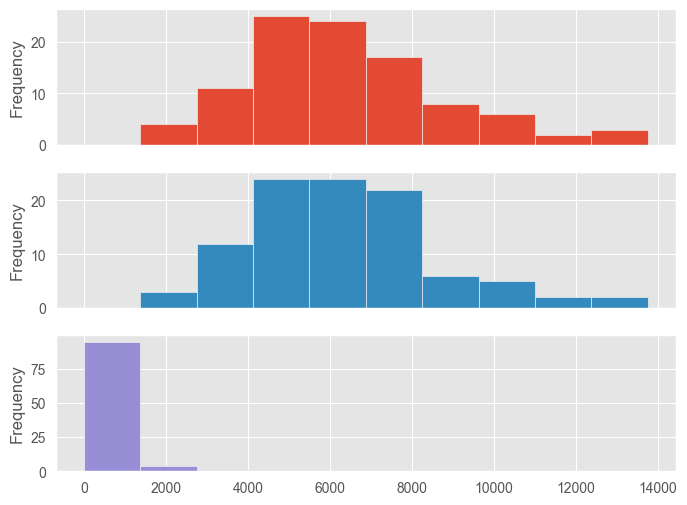

In [120]:
plt.style.use('ggplot')
# Plotting the histogram for Actual, Predicted, and Difference of sales
dataset_rf.plot.hist(subplots=True, layout=(3, 1), legend=False)
plt.show()

**As we can see that Actual, Prediction values are approximately closed to each other and there is no such significant variation in our plots.**

In [122]:
print(dataset_rf.columns)


Index(['Real', 'PredictedRF', 'diff'], dtype='object')


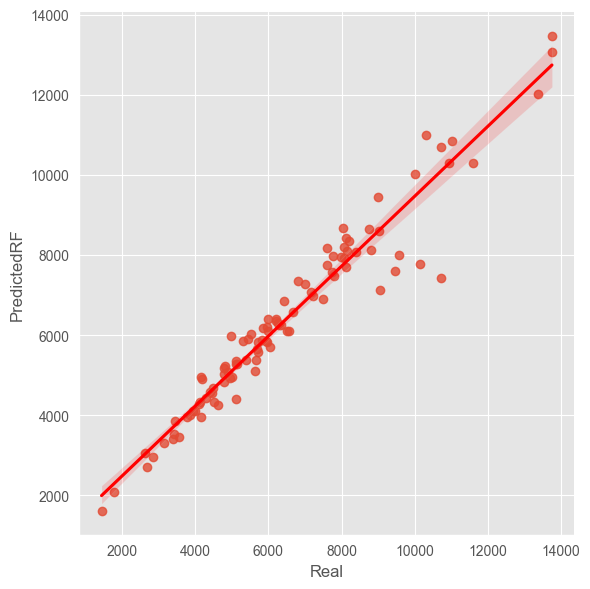

In [123]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedRF', data=dataset_rf, line_kws={'color': 'red'}, height=6, aspect=1)

## **Feature Importance On Random Forest Regressor**

As we can see that Random Forest has the highest test score

In [126]:
def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  colors = sns.color_palette("viridis", len(fi_df))
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'], palette=colors)
  #Add chart labels
  plt.title(model_type + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

/var/folders/4p/r3zy7pns7t38_zwr2sjgxj8c0000gp/T/ipykernel_85617/1459841611.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'], palette=colors)


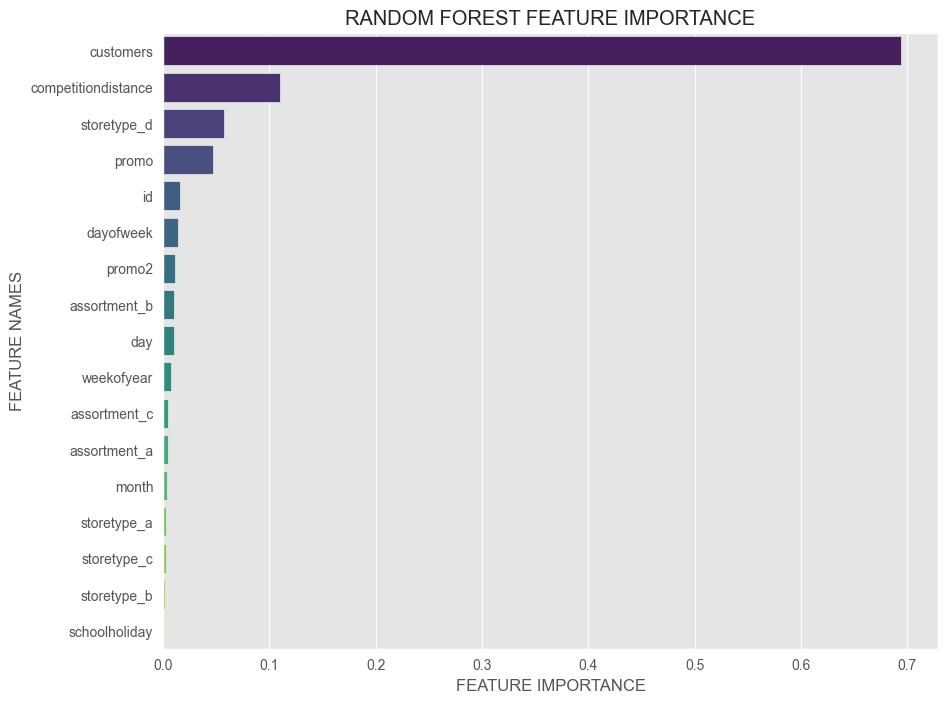

In [127]:
plot_feature_importance(rdfreg.feature_importances_,columns[:],'RANDOM FOREST')


**Customers, CompetitionDistance, StoreType_d, Promo these four are most important features in our sales prediction.**

In [160]:
train_score_knn=0.6769432117695016 #forgot during training, thus assigning manually
test_score_knn=0.651167641097711

In [170]:
score_df = pd.DataFrame({'Train_Score':[train_score_1,train_score_2,train_score_3,train_score_4,train_score_knn,train_score_5],'Test_Score':[test_score_1,test_score_2,test_score_3,test_score_4,test_score_knn,test_score_5]},index=['Linear Regression','Lasso Regression','Decision Tree',"Decision Tree(hyperparameters)",'KNN','Random Forest Regression'])

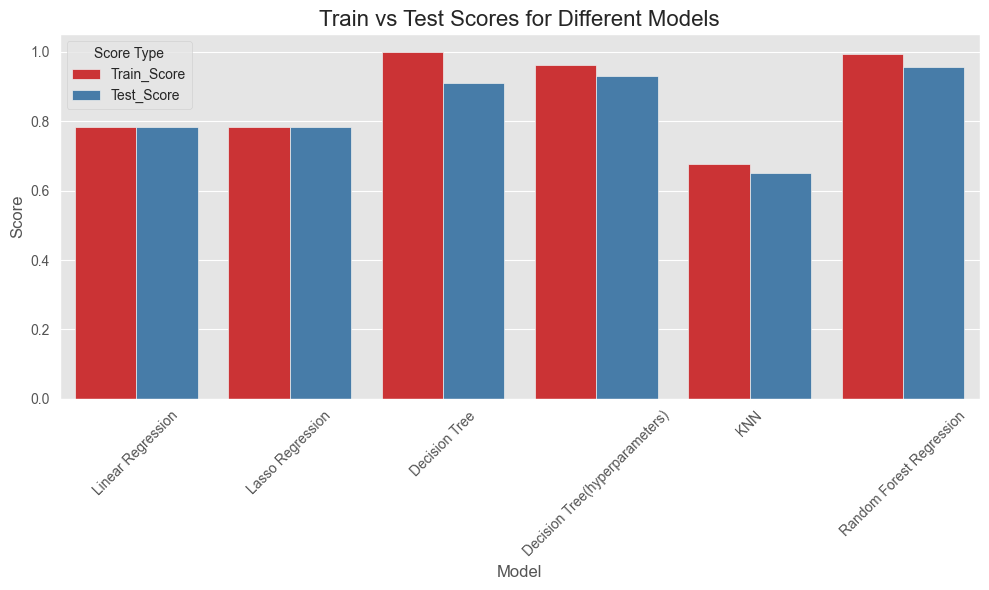

In [171]:
score_df.reset_index(inplace=True)
score_df.rename(columns={'index': 'Model'}, inplace=True)

# Melt the dataframe for seaborn compatibility
score_df_melted = score_df.melt(id_vars=['Model'], value_vars=['Train_Score', 'Test_Score'], 
                                var_name='Score_Type', value_name='Score')

# Plotting
plt.figure(figsize=(10, 6))
sns.set_palette("Set1")  # Change color palette
sns.barplot(x='Model', y='Score', hue='Score_Type', data=score_df_melted)

# Customize the plot
plt.title('Train vs Test Scores for Different Models', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Score Type')

# Show the plot
plt.tight_layout()
plt.show()

# **Conclusion**

In [163]:
score_df

,Model,Train_Score,Test_Score
0,Linear Regression,0.783714,0.783973
1,Lasso Regression,0.783695,0.783955
2,Decision Tree,1.000000,0.910359
3,Decision Tree(hyperparameters),0.962855,0.929569
4,KNN,0.676943,0.651168
5,Random Forest Regression,0.993722,0.956205


**Random Forest regressor achieved lowest MAPE as 5.65% showing that it is a highly accurate model. MAE is the average magnitude of error produced by your model, the MAPE is how far the model’s predictions are off from their corresponding outputs on average**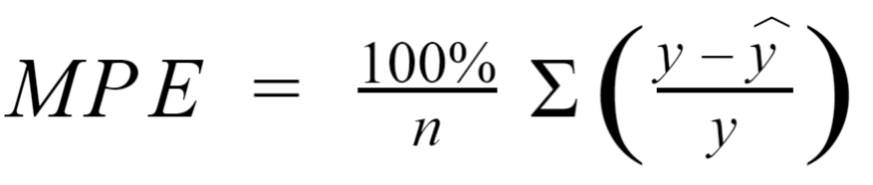

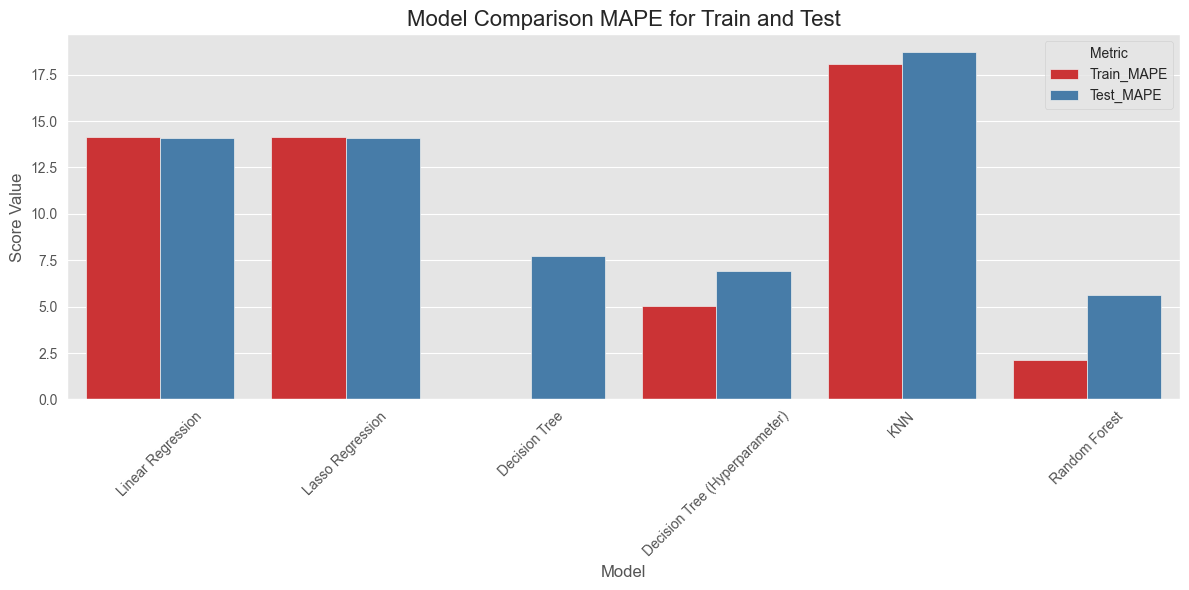

In [174]:
score_df_mape = pd.DataFrame({
    'Train_RMSE': [1148.5155712691585, 1148.5663125136766, 0.0, 475.9603158051788, 1403.6600848568366, 195.67066329604697],
    'Test_RMSE': [1145.7200607239986, 1145.7661292396926, 738.0357000513005, 654.1943902989904, 1455.903948654709, 515.863430260663],
    'Train_MAPE': [14.128762809238363, 14.13336720582164, 0.0, 5.03618980365554, 18.084037703407, 2.1060676268713863],
    'Test_MAPE': [14.080610509749569, 14.08507704, 7.733286662647336, 6.942528087053865, 18.72932102522484, 5.6187714979872565]
}, index=['Linear Regression', 'Lasso Regression', 'Decision Tree', 'Decision Tree (Hyperparameter)', 'KNN', 'Random Forest'])

# Resetting index and renaming for compatibility with seaborn
score_df_mape.reset_index(inplace=True)
score_df_mape.rename(columns={'index': 'Model'}, inplace=True)

# Melting the dataframe for seaborn compatibility
score_df_melted_mape = score_df_mape.melt(id_vars=['Model'], value_vars=['Train_MAPE', 'Test_MAPE'], 
                                var_name='Metric', value_name='Value')

# Plotting the comparison of all metrics (RMSE and MAPE)
plt.figure(figsize=(12, 6))
sns.set_palette("Set1")  # Change color palette
sns.barplot(x='Model', y='Value', hue='Metric', data=score_df_melted_mape)

# Customize the plot
plt.title('Model Comparison MAPE for Train and Test', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score Value', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Metric')

# Show the plot
plt.tight_layout()
plt.show()

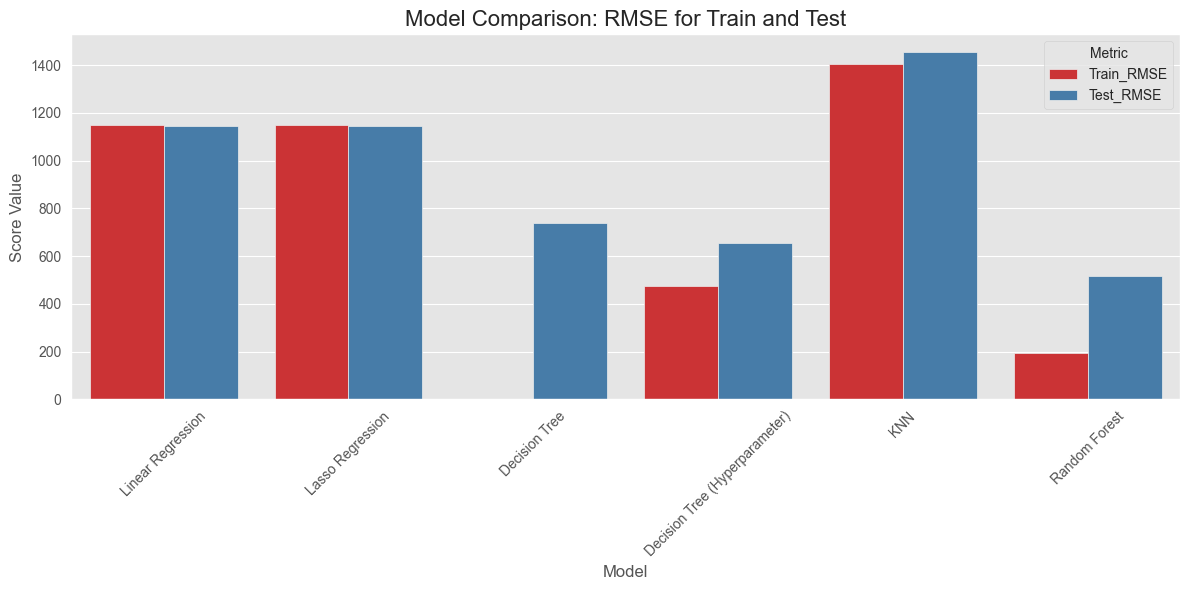

In [173]:
score_df_melted_mape = score_df_mape.melt(id_vars=['Model'], value_vars=['Train_RMSE', 'Test_RMSE'], 
                                var_name='Metric', value_name='Value')

# Plotting the comparison of all metrics (RMSE and MAPE)
plt.figure(figsize=(12, 6))
sns.set_palette("Set1")  # Change color palette
sns.barplot(x='Model', y='Value', hue='Metric', data=score_df_melted_mape)

# Customize the plot
plt.title('Model Comparison: RMSE for Train and Test', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score Value', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Metric')

# Show the plot
plt.tight_layout()
plt.show()